# **1. Data Collection**

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [113]:
df_2024 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2024_Korean_Quality.csv')
df_2023 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2023_Korean_Quality.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2022_Korean_Quality.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2021_Korean_Quality.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2020_Korean_Quality.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2019_Korean_Quality.csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2018_Korean_Quality.csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2017_Korean_Quality.csv')
df_2016 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2016_Korean_Quality.csv')
df_2015 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2015_Korean_Quality.csv')
df_2014 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2014_Korean_Quality.csv')
df_2013 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2013_Korean_Quality.csv')
df_2012 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2012_Korean_Quality.csv')
df_2011 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2011_Korean_Quality.csv')
df_2010 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2010_Korean_Quality.csv')
df_2009 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2009_Korean_Quality.csv')
df_2008 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2008_Korean_Quality.csv')
df_2007 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2007_Korean_Quality.csv')
df_2006 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2006_Korean_Quality.csv')
df_2005 = pd.read_csv('/content/drive/MyDrive/Korean Sea Quality/2005_Korean_Quality.csv')

In [114]:
frames = [df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,
          df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023,df_2024]
df = pd.concat(frames)
df

,Seas(1),Name of Coastal Category(1),Floors(1),Period,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
0,East Sea,Geojin Coast,Surface Layer,2005,13.38,33.83,8.05,9.02,0.56,68.8,221.3,11.3,30.3,172.5,5.5,0.77
1,East Sea,Sokcho Coast,Surface Layer,2005,12.88,33.59,8.10,8.86,0.58,68.3,178.3,10.3,24.5,159.3,3.7,0.91
2,East Sea,Yangyang Coast,Surface Layer,2005,13.03,33.60,8.11,9.14,0.64,63.3,185.8,8.3,19.3,150.8,3.5,1.21
3,East Sea,Jumunjin Coast,Surface Layer,2005,13.05,33.61,8.04,8.74,0.85,71.3,214.0,11.5,31.0,201.0,3.7,1.13
4,East Sea,Gangeung Coast,Surface Layer,2005,13.65,33.60,8.03,8.52,0.92,72.0,198.5,13.3,41.3,205.0,4.4,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,West Sea,Cheonsu Bay,Surface Layer,2024,17.32,30.77,8.17,8.97,1.82,75.3,241.1,13.7,35.3,275.2,13.1,7.24
45,West Sea,Taean Coast,Surface Layer,2024,15.92,31.36,8.11,8.85,1.39,87.7,216.1,13.7,29.9,289.9,15.8,4.49
46,West Sea,Garorim Coast,Surface Layer,2024,15.51,31.34,8.06,8.94,1.20,119.7,227.0,16.3,27.6,252.1,18.6,3.18
47,West Sea,Daesan Coast,Surface Layer,2024,15.40,30.76,8.07,9.16,1.42,164.4,281.4,19.5,32.5,303.4,20.3,2.09


# **2. Exploratory Data Analysis**

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 48
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Seas(1)                         980 non-null    object 
 1   Name of Coastal Category(1)     980 non-null    object 
 2   Floors(1)                       980 non-null    object 
 3   Period                          980 non-null    int64  
 4   Temperature                     980 non-null    float64
 5   Salinity                        980 non-null    float64
 6   Hydrogen ion concentration      980 non-null    float64
 7   Dissolved Oxygen                980 non-null    float64
 8   Chemical Oxygen Demand          980 non-null    float64
 9   Dissolved Inorganic Nitrogen    980 non-null    float64
 10  Total Nitrogen                  980 non-null    float64
 11  Dissolved Inorganic Phosphorus  980 non-null    float64
 12  Total Phosphorus                980 non-nu

In [116]:
df.describe()

,Period,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,2014.500000,16.540153,32.439061,8.135224,8.680673,1.215276,86.321020,267.691429,10.488571,26.181633,261.881837,11.486122,2.488000
std,5.769226,1.814624,1.387087,0.086297,0.561488,0.429037,72.220195,159.935324,5.763539,12.482852,122.171818,12.080705,2.113136
min,2005.000000,11.940000,25.650000,7.820000,6.920000,0.250000,0.100000,0.200000,0.000000,0.000000,0.300000,1.300000,0.180000
25%,2009.750000,15.410000,31.617500,8.087500,8.300000,0.907500,43.775000,161.375000,6.300000,16.375000,178.450000,4.900000,1.190000
50%,2014.500000,16.500000,32.970000,8.150000,8.675000,1.160000,60.850000,217.400000,9.100000,23.500000,237.000000,7.950000,1.830000
75%,2019.250000,17.585000,33.452500,8.190000,9.012500,1.460000,99.200000,310.175000,13.400000,32.625000,316.150000,13.900000,3.090000
max,2024.000000,21.300000,34.280000,8.430000,10.620000,3.060000,676.400000,1230.800000,47.600000,79.300000,985.200000,186.900000,18.810000


In [117]:
df['Seas(1)'].unique()

array(['East Sea', 'South Sea', 'West Sea'], dtype=object)

In [118]:
df['Name of Coastal Category(1)'].unique()

array(['Geojin Coast', 'Sokcho Coast', 'Yangyang Coast', 'Jumunjin Coast',
       'Gangeung Coast', 'Donghae Coast', 'Samcheok Coast',
       'Jukbyeon Coast', 'Hupo Coast', 'Chuksan Coast', 'Ganggu Coast',
       'Wolpo Coast', 'Yeongil Coast', 'Guryongpo Coast', 'Gampo Coast',
       'Gijang Coast', 'Jinhae Bay', 'Geoje East-Coast',
       'Geoje South-Coast', 'Tongyeong Coast', 'Tongyeong Bayhead',
       'Goseong Jaran Coast', 'Sacheon Coast', 'Jinju Bay',
       'Namhae Island South Coast', 'Yeosu Coast', 'Yeoja Bay',
       'Goheung Coast', 'Jeju Coast', 'Jocheon Coast', 'Seongsan Coast',
       'Pyoseon Coast', 'Seogwipo Coast', 'Daejeong Coast',
       'Hallim Coast', 'Jindo Coast', 'Haenam Bay', 'Mokpo Coast',
       'Sinan Coast', 'Muan Coast', 'Gochang Coast', 'Jeonjupo Coast',
       'Gunsan Coast', 'Boryeong Coast', 'Cheonsu Bay', 'Taean Coast',
       'Garorim Coast', 'Daesan Coast', 'Asan Coast'], dtype=object)

In [119]:
df['Floors(1)'].unique()

array(['Surface Layer'], dtype=object)

In [120]:
df['Period'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [121]:
df.shape

(980, 16)

In [122]:
df.isnull().sum()

,0
Seas(1),0
Name of Coastal Category(1),0
Floors(1),0
Period,0
Temperature,0
Salinity,0
Hydrogen ion concentration,0
Dissolved Oxygen,0
Chemical Oxygen Demand,0
Dissolved Inorganic Nitrogen,0


In [123]:
df.head(10)

,Seas(1),Name of Coastal Category(1),Floors(1),Period,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
0,East Sea,Geojin Coast,Surface Layer,2005,13.38,33.83,8.05,9.02,0.56,68.8,221.3,11.3,30.3,172.5,5.5,0.77
1,East Sea,Sokcho Coast,Surface Layer,2005,12.88,33.59,8.10,8.86,0.58,68.3,178.3,10.3,24.5,159.3,3.7,0.91
2,East Sea,Yangyang Coast,Surface Layer,2005,13.03,33.60,8.11,9.14,0.64,63.3,185.8,8.3,19.3,150.8,3.5,1.21
3,East Sea,Jumunjin Coast,Surface Layer,2005,13.05,33.61,8.04,8.74,0.85,71.3,214.0,11.5,31.0,201.0,3.7,1.13
4,East Sea,Gangeung Coast,Surface Layer,2005,13.65,33.60,8.03,8.52,0.92,72.0,198.5,13.3,41.3,205.0,4.4,1.01
5,East Sea,Donghae Coast,Surface Layer,2005,14.55,33.74,8.08,8.80,0.83,73.0,229.0,17.3,42.8,189.3,4.0,0.92
6,East Sea,Samcheok Coast,Surface Layer,2005,15.18,33.69,8.08,8.71,0.99,87.5,186.0,13.0,47.8,195.8,4.7,1.02
7,East Sea,Jukbyeon Coast,Surface Layer,2005,15.20,33.57,8.10,8.77,0.80,59.0,174.8,10.8,35.8,187.3,4.6,1.03
8,East Sea,Hupo Coast,Surface Layer,2005,14.98,33.41,7.98,9.38,0.75,45.3,102.0,6.3,16.5,172.0,6.9,1.61
9,East Sea,Chuksan Coast,Surface Layer,2005,15.35,33.47,7.95,9.50,0.62,34.0,94.5,7.3,18.0,165.5,6.5,1.98


In [124]:
df.tail(10)

,Seas(1),Name of Coastal Category(1),Floors(1),Period,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
39,West Sea,Muan Coast,Surface Layer,2024,17.98,30.37,7.95,8.33,1.31,251.8,348.9,21.4,32.1,519.0,27.4,1.97
40,West Sea,Gochang Coast,Surface Layer,2024,18.22,31.08,8.10,8.47,1.97,91.7,257.6,13.4,44.0,291.3,47.1,6.60
41,West Sea,Jeonjupo Coast,Surface Layer,2024,17.18,30.82,8.14,8.89,2.11,77.5,244.9,10.4,32.6,236.6,12.4,6.70
42,West Sea,Gunsan Coast,Surface Layer,2024,17.36,28.12,8.17,9.21,2.92,233.8,424.3,13.0,44.6,333.2,19.5,13.40
43,West Sea,Boryeong Coast,Surface Layer,2024,17.33,31.23,8.15,9.00,1.72,59.3,205.6,10.6,28.3,241.4,12.6,6.51
44,West Sea,Cheonsu Bay,Surface Layer,2024,17.32,30.77,8.17,8.97,1.82,75.3,241.1,13.7,35.3,275.2,13.1,7.24
45,West Sea,Taean Coast,Surface Layer,2024,15.92,31.36,8.11,8.85,1.39,87.7,216.1,13.7,29.9,289.9,15.8,4.49
46,West Sea,Garorim Coast,Surface Layer,2024,15.51,31.34,8.06,8.94,1.20,119.7,227.0,16.3,27.6,252.1,18.6,3.18
47,West Sea,Daesan Coast,Surface Layer,2024,15.40,30.76,8.07,9.16,1.42,164.4,281.4,19.5,32.5,303.4,20.3,2.09
48,West Sea,Asan Coast,Surface Layer,2024,15.76,29.82,8.06,9.01,1.55,248.2,380.1,24.3,39.9,409.5,20.7,2.72


In [125]:
df.columns

Index(['Seas(1)', 'Name of Coastal Category(1)', 'Floors(1)', 'Period',
       'Temperature', 'Salinity', 'Hydrogen ion concentration',
       'Dissolved Oxygen', 'Chemical Oxygen Demand',
       'Dissolved Inorganic Nitrogen', 'Total Nitrogen',
       'Dissolved Inorganic Phosphorus', 'Total Phosphorus',
       'Silicic Acid Silicon', 'Suspended Solids', 'Chlorophyll'],
      dtype='object')

In [126]:
df.nunique()

,0
Seas(1),3
Name of Coastal Category(1),49
Floors(1),1
Period,20
Temperature,521
Salinity,370
Hydrogen ion concentration,52
Dissolved Oxygen,244
Chemical Oxygen Demand,192
Dissolved Inorganic Nitrogen,679


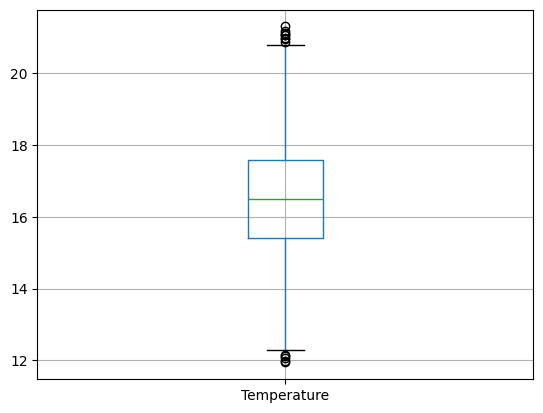

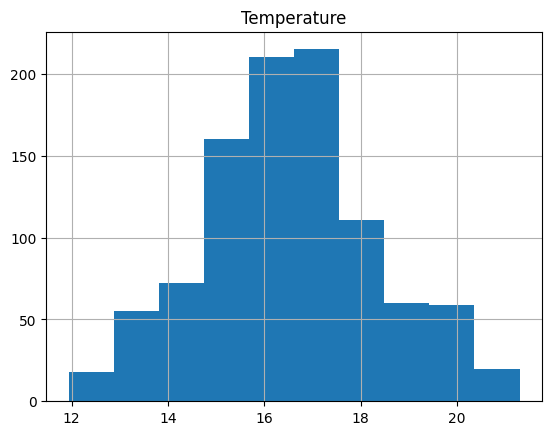

In [127]:
#1.Temperature
boxplot1b = df.boxplot(column=['Temperature'])
hist_1b = df.hist(column=['Temperature'])

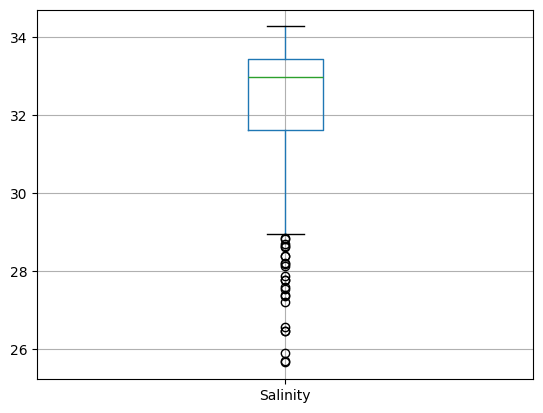

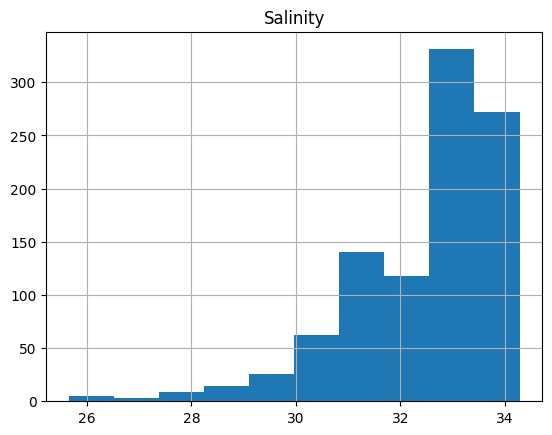

In [128]:
#2.Salinity
boxplot2b = df.boxplot(column=['Salinity'])
hist_2b = df.hist(column=['Salinity'])

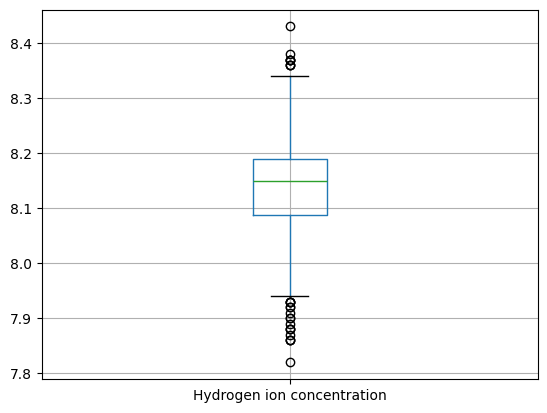

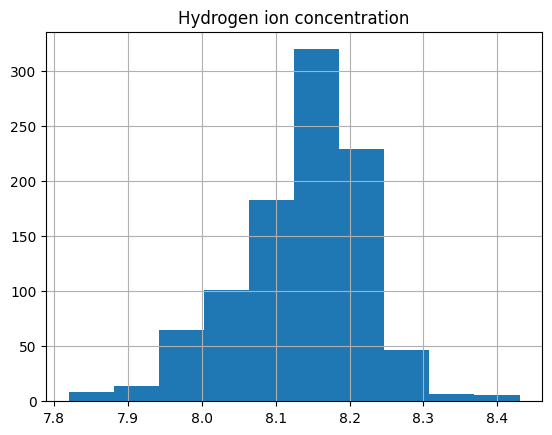

In [129]:
#3.Hydrogenion concentration
boxplot3b = df.boxplot(column=['Hydrogen ion concentration'])
hist_3b = df.hist(column=['Hydrogen ion concentration'])

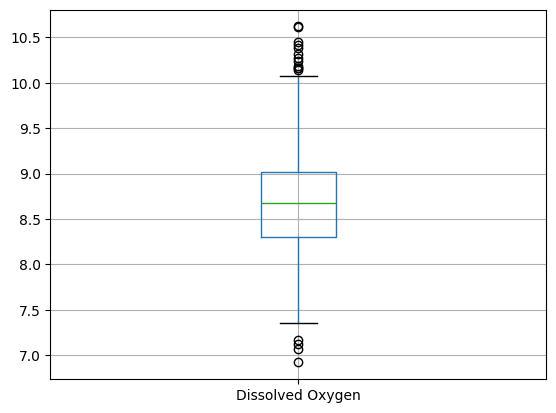

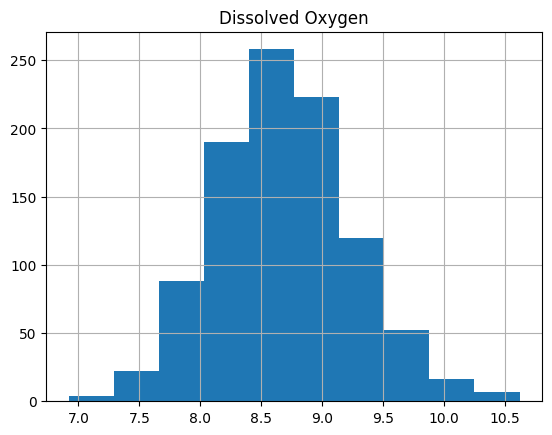

In [130]:
#4.Dissolved Oxygen
boxplot4b = df.boxplot(column=['Dissolved Oxygen'])
hist_4b = df.hist(column=['Dissolved Oxygen'])

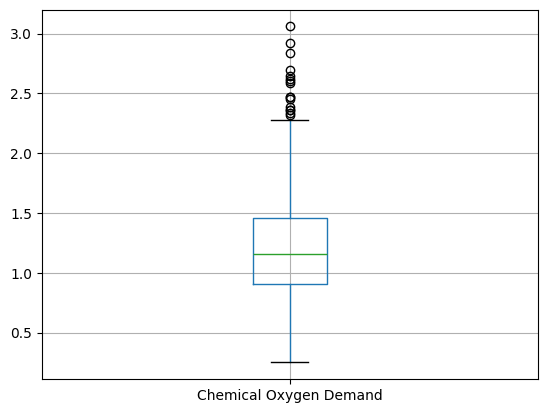

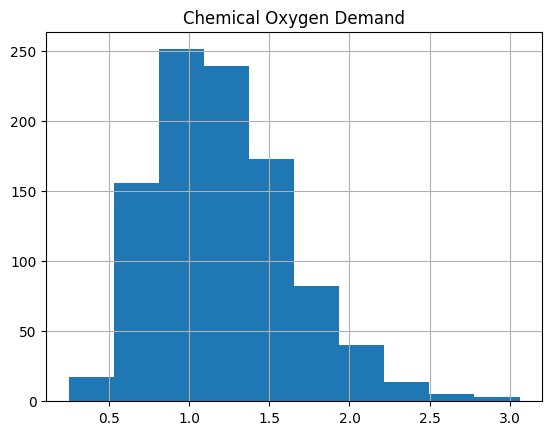

In [131]:
#5.Chemical Oxygen Demand
boxplot5b = df.boxplot(column=['Chemical Oxygen Demand'])
hist_5b = df.hist(column=['Chemical Oxygen Demand'])

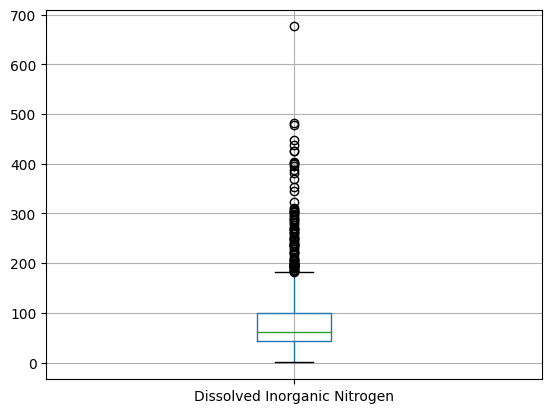

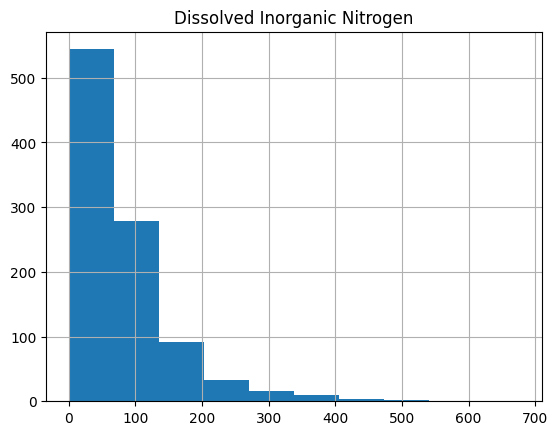

In [132]:
#6.Dissolved Inorganic Nitrogen
boxplot6b = df.boxplot(column=['Dissolved Inorganic Nitrogen'])
hist_6b = df.hist(column=['Dissolved Inorganic Nitrogen'])

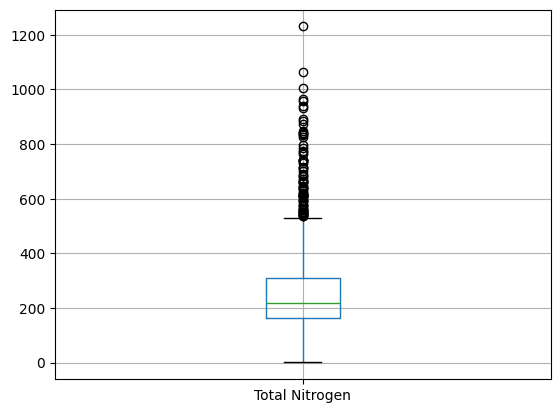

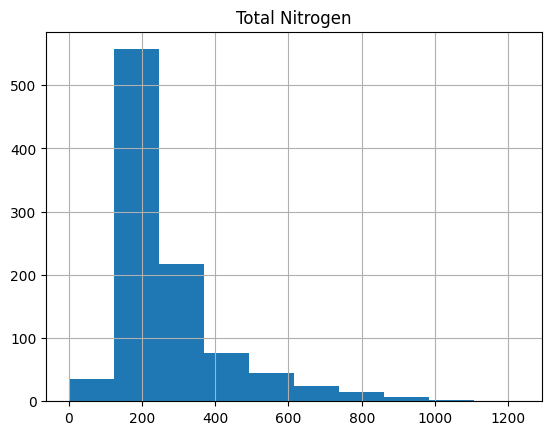

In [133]:
#7.Total Nitrogen
boxplot7b = df.boxplot(column=['Total Nitrogen'])
hist_7b = df.hist(column=['Total Nitrogen'])

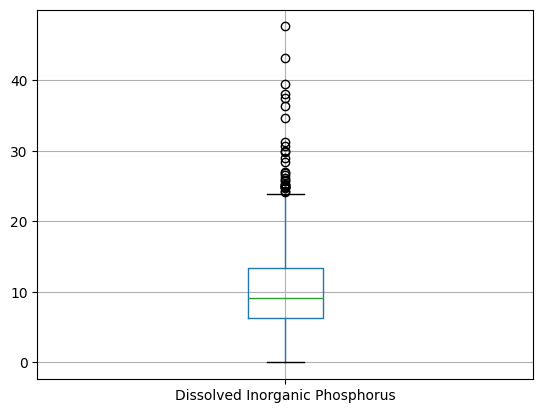

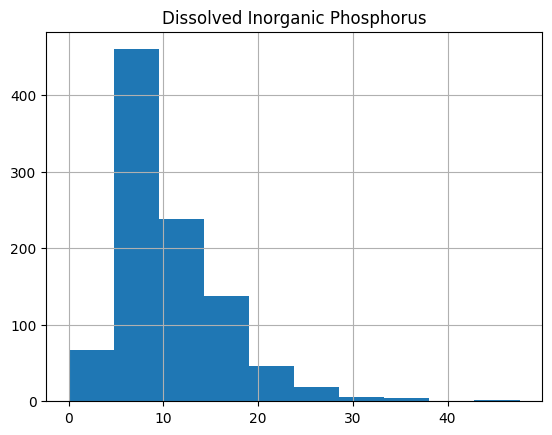

In [134]:
#8.Dissolved Inorganic Phosphorus
boxplot8b = df.boxplot(column=['Dissolved Inorganic Phosphorus'])
hist_8b = df.hist(column=['Dissolved Inorganic Phosphorus'])

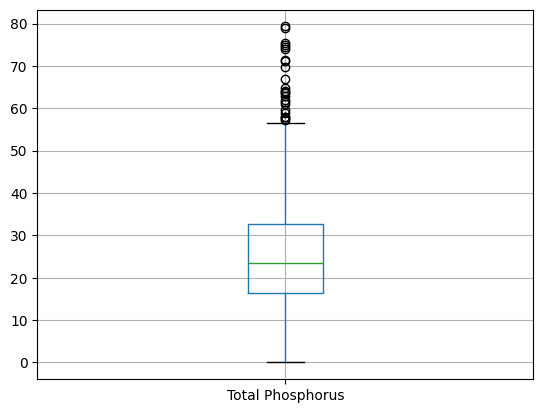

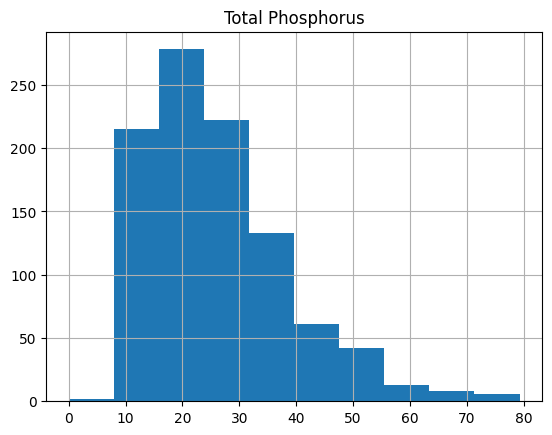

In [135]:
#9.Total Phosphorus
boxplot9b = df.boxplot(column=['Total Phosphorus'])
hist_9b = df.hist(column=['Total Phosphorus'])

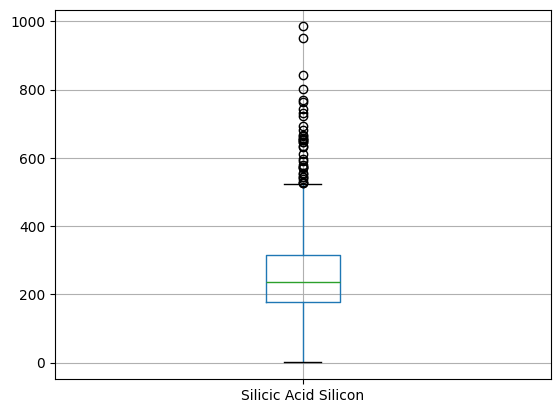

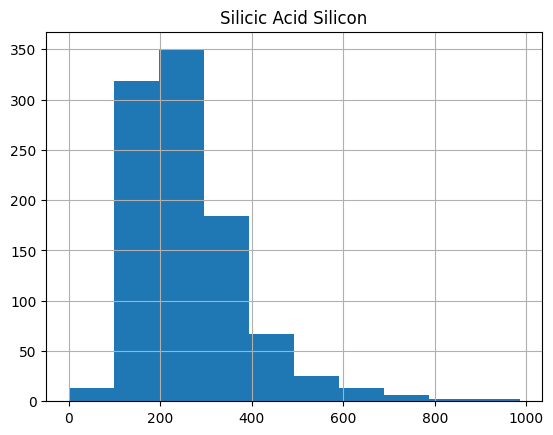

In [136]:
#10.Silicic Acid Silicon
boxplot10b = df.boxplot(column=['Silicic Acid Silicon'])
hist_10b = df.hist(column=['Silicic Acid Silicon'])

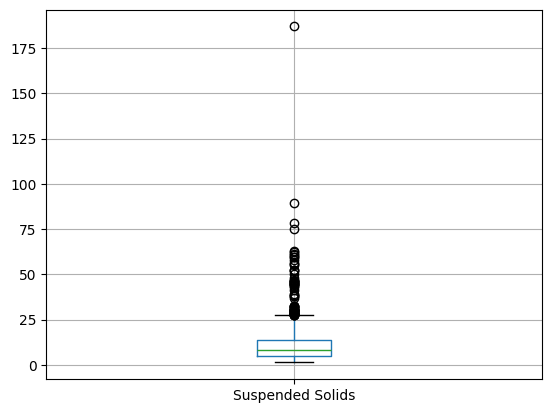

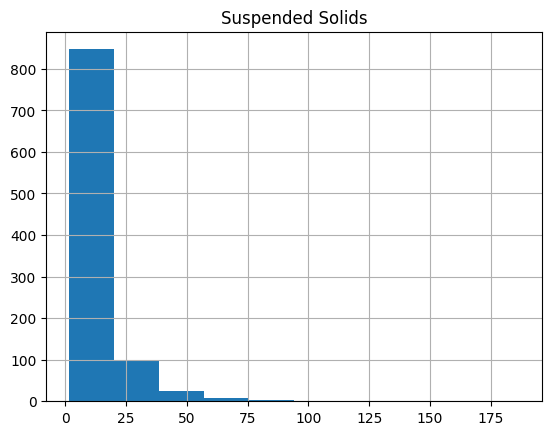

In [137]:
#11.Suspended Solids
boxplot11b = df.boxplot(column=['Suspended Solids'])
hist_11b = df.hist(column=['Suspended Solids'])

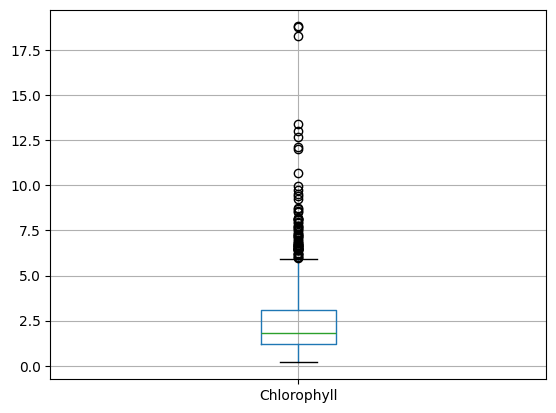

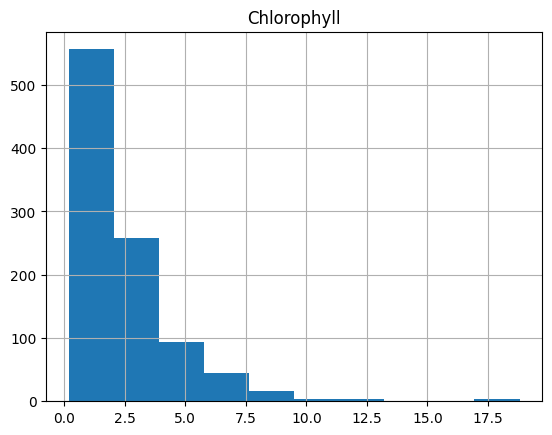

In [138]:
#12.Chlorophyll
boxplot12b = df.boxplot(column=['Chlorophyll'])
hist_12b = df.hist(column=['Chlorophyll'])

# **3. Data Preprocessing**

In [139]:
df = df.reset_index()
df.drop(columns=['index'],inplace=True)
df.drop(columns=['Seas(1)'],inplace=True)
df.drop(columns=['Name of Coastal Category(1)'],inplace=True)
df.drop(columns=['Floors(1)'],inplace=True)
df.drop(columns=['Period'],inplace=True)

In [140]:
df

,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
0,13.38,33.83,8.05,9.02,0.56,68.8,221.3,11.3,30.3,172.5,5.5,0.77
1,12.88,33.59,8.10,8.86,0.58,68.3,178.3,10.3,24.5,159.3,3.7,0.91
2,13.03,33.60,8.11,9.14,0.64,63.3,185.8,8.3,19.3,150.8,3.5,1.21
3,13.05,33.61,8.04,8.74,0.85,71.3,214.0,11.5,31.0,201.0,3.7,1.13
4,13.65,33.60,8.03,8.52,0.92,72.0,198.5,13.3,41.3,205.0,4.4,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...
975,17.32,30.77,8.17,8.97,1.82,75.3,241.1,13.7,35.3,275.2,13.1,7.24
976,15.92,31.36,8.11,8.85,1.39,87.7,216.1,13.7,29.9,289.9,15.8,4.49
977,15.51,31.34,8.06,8.94,1.20,119.7,227.0,16.3,27.6,252.1,18.6,3.18
978,15.40,30.76,8.07,9.16,1.42,164.4,281.4,19.5,32.5,303.4,20.3,2.09


In [141]:
df.skew()

,0
Temperature,0.112413
Salinity,-1.585427
Hydrogen ion concentration,-0.511741
Dissolved Oxygen,0.253329
Chemical Oxygen Demand,0.732317
Dissolved Inorganic Nitrogen,2.742946
Total Nitrogen,2.058972
Dissolved Inorganic Phosphorus,1.696376
Total Phosphorus,1.205547
Silicic Acid Silicon,1.634554


IQR Outliers
245    11.99
292    12.07
293    12.12
294    11.94
539    12.14
619    20.86
767    20.94
913    20.98
914    21.12
962    21.17
963    21.30
964    21.07
965    21.07
Name: Temperature, dtype: float64
Box plot and Histogram


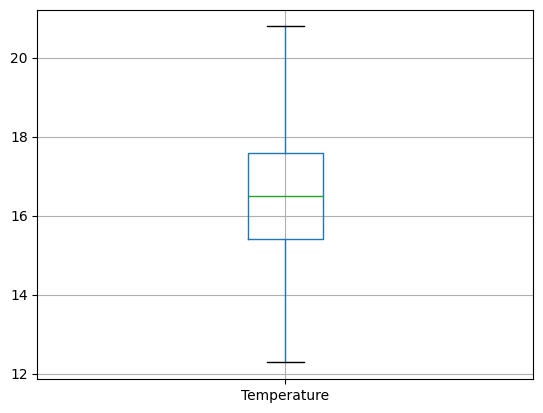

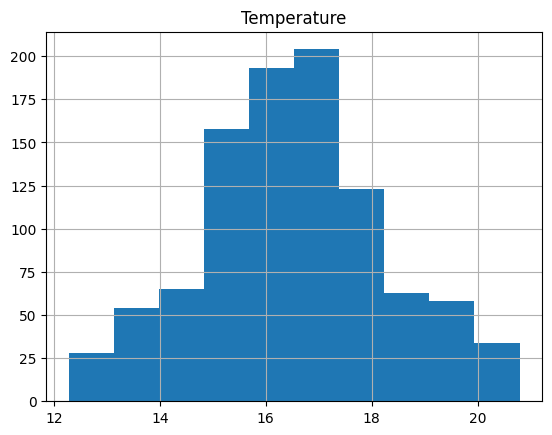

In [142]:
#Temperature
#IQR1
q1_1 = df['Temperature'].quantile(0.25)
q3_1 = df['Temperature'].quantile(0.75)
iqr_1 = q3_1 - q1_1
threshold_iqr1 = 1.5 * iqr_1
outliersiqr1 = df[(df['Temperature']<q1_1-threshold_iqr1)|(df['Temperature']>q3_1+threshold_iqr1)]
print("IQR Outliers")
print(outliersiqr1['Temperature'])
df.loc[(df['Temperature']<q1_1-threshold_iqr1)] = q1_1
df.loc[(df['Temperature']>q3_1+threshold_iqr1)] = q3_1
print("Box plot and Histogram")
boxplot1a = df.boxplot(column=['Temperature'])
hist_1a = df.hist(column=['Temperature'])

In [143]:
#2.Salinity
yeojohnson(df['Salinity'])

(array([2.40342091e+19, 2.19228829e+19, 2.20073135e+19, 2.20920446e+19,
        2.20073135e+19, 2.32213577e+19, 2.27808349e+19, 2.17549198e+19,
        2.04534366e+19, 2.09328113e+19, 2.03745350e+19, 2.14225582e+19,
        1.59345967e+19, 2.28683163e+19, 2.02175755e+19, 1.88544196e+19,
        4.52553532e+18, 1.37084101e+19, 2.04534366e+19, 2.03745350e+19,
        1.99842319e+19, 1.59345967e+19, 1.51978713e+19, 9.61036248e+18,
        1.96008534e+19, 1.14452533e+19, 7.59600420e+18, 1.81343493e+19,
        2.33997623e+19, 2.35794338e+19, 2.27808349e+19, 2.38513343e+19,
        2.34894392e+19, 2.42183798e+19, 2.33997623e+19, 1.67042302e+19,
        4.37130233e+18, 7.78796156e+18, 1.55622027e+19, 1.24545072e+19,
        5.97848392e+18, 7.78796156e+18, 2.87551645e+18, 6.81367524e+18,
        5.80349717e+18, 8.32199949e+18, 9.00008787e+18, 7.28577126e+18,
        4.46711766e+18, 1.91497805e+19, 1.88544196e+19, 2.02959150e+19,
        1.71689133e+19, 1.83476538e+19, 2.08522008e+19, 1.644394

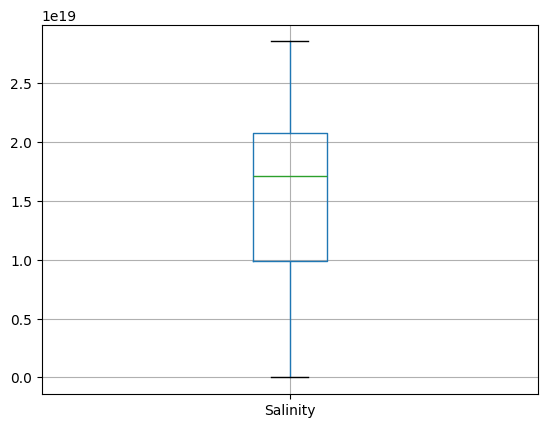

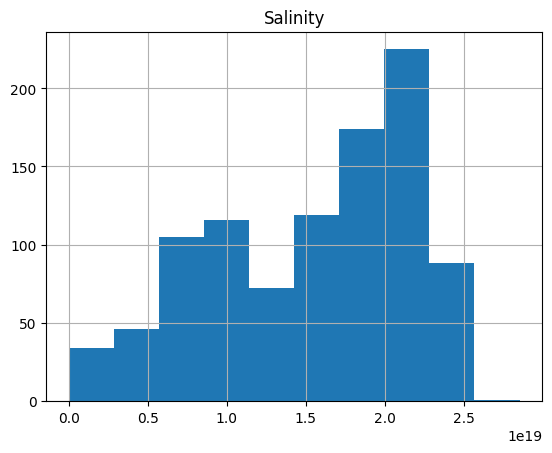

In [144]:
df['Salinity'] = yeojohnson(df['Salinity'],13.297813727895377)
boxplot2an = df.boxplot(column=['Salinity'])
hist_2an = df.hist(column=['Salinity'])

IQR Outliers
19      7.860
59      7.860
98      7.880
114     7.900
189     7.910
245    15.410
267     7.880
280     7.890
292    15.410
293    15.410
294    15.410
539    15.410
619    17.585
764     8.370
765     8.370
766     8.380
767    17.585
768     8.370
824     7.860
826     7.870
827     7.920
828     7.880
829     7.820
877     8.370
901     7.920
903     7.900
913    17.585
914    17.585
962    17.585
963    17.585
964    17.585
965    17.585
Name: Hydrogen ion concentration, dtype: float64


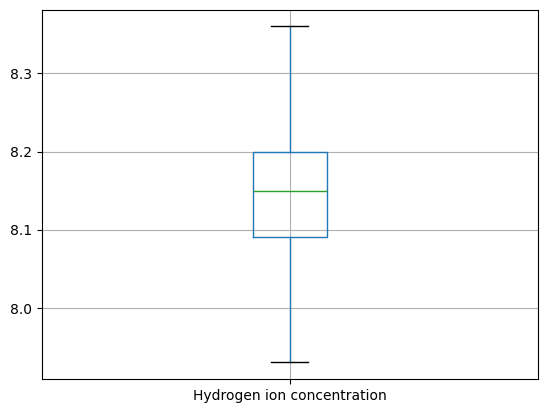

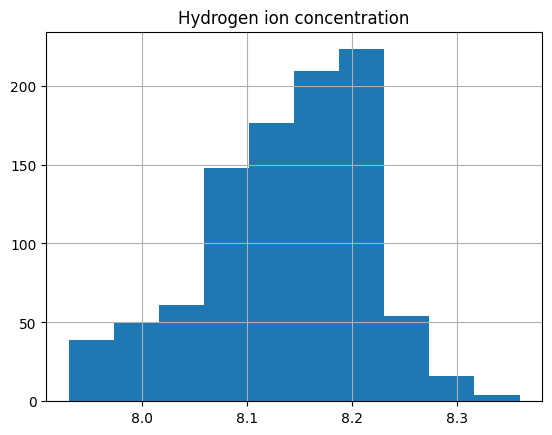

In [145]:
#3.Hydrogenion concentration
#IQR3
q1_3 = df['Hydrogen ion concentration'].quantile(0.25)
q3_3 = df['Hydrogen ion concentration'].quantile(0.75)
iqr_3 = q3_3 - q1_3
threshold_iqr3 = 1.5 * iqr_3
outliersiqr3 = df[(df['Hydrogen ion concentration']<q1_3-threshold_iqr3)|(df['Hydrogen ion concentration']>q3_3+threshold_iqr3)]
#Result1
print("IQR Outliers")
print(outliersiqr3['Hydrogen ion concentration'])
df.loc[(df['Hydrogen ion concentration']<q1_3-threshold_iqr3)] = q1_3
df.loc[(df['Hydrogen ion concentration']>q3_3+threshold_iqr3)] = q3_3
boxplot3a = df.boxplot(column=['Hydrogen ion concentration'])
hist_3a = df.hist(column=['Hydrogen ion concentration'])

IQR Outliers
74     10.38
75     10.16
87      7.12
90     10.19
173     6.92
183    10.32
232    10.62
233    10.16
281    10.61
295    10.14
310    10.42
428    10.27
722    10.24
900     7.07
Name: Dissolved Oxygen, dtype: float64


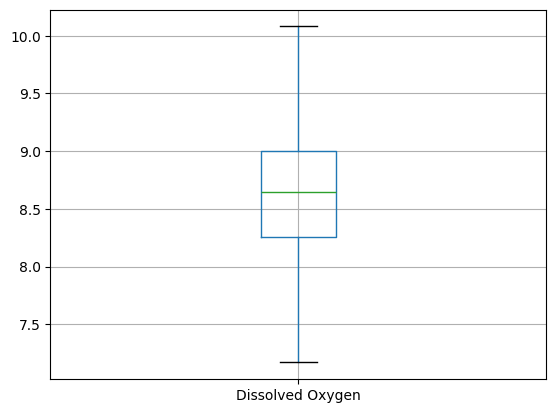

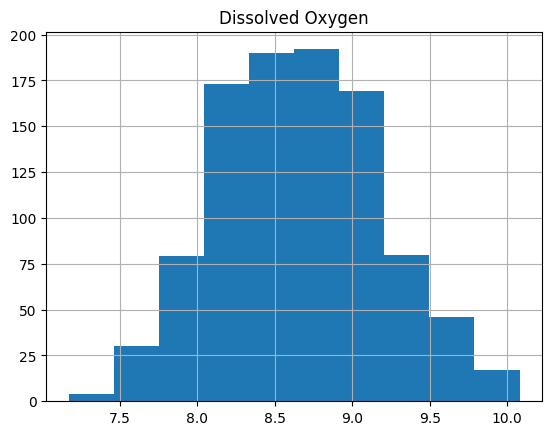

In [146]:
#4.Dissolved Oxygen
#IQR4
q1_4 = df['Dissolved Oxygen'].quantile(0.25)
q3_4 = df['Dissolved Oxygen'].quantile(0.75)
iqr_4 = q3_4 - q1_4
threshold_iqr4 = 1.5 * iqr_4
outliersiqr4 = df[(df['Dissolved Oxygen']<q1_4-threshold_iqr4)|(df['Dissolved Oxygen']>q3_4+threshold_iqr4)]
#Result4
print("IQR Outliers")
print(outliersiqr4['Dissolved Oxygen'])
df.loc[(df['Dissolved Oxygen']<q1_4-threshold_iqr4)] = q1_4
df.loc[(df['Dissolved Oxygen']>q3_4+threshold_iqr4)] = q3_4
boxplot4b = df.boxplot(column=['Dissolved Oxygen'])
hist_4b = df.hist(column=['Dissolved Oxygen'])

IQR Outliers
19     8.09
59     8.09
65     2.62
74     9.00
75     9.00
87     8.26
90     9.00
98     8.09
114    8.09
173    8.26
183    9.00
189    8.09
212    3.06
232    9.00
233    9.00
245    8.20
267    8.09
280    8.09
281    9.00
292    8.20
293    8.20
294    8.20
295    9.00
310    9.00
428    9.00
453    2.47
539    8.20
619    8.20
722    9.00
761    2.45
764    8.20
765    8.20
766    8.20
767    8.20
768    8.20
775    2.70
810    2.60
824    8.09
826    8.09
827    8.09
828    8.09
829    8.09
859    2.65
875    2.84
877    8.20
900    8.26
901    8.09
903    8.09
913    8.20
914    8.20
922    2.59
962    8.20
963    8.20
964    8.20
965    8.20
973    2.92
Name: Chemical Oxygen Demand, dtype: float64


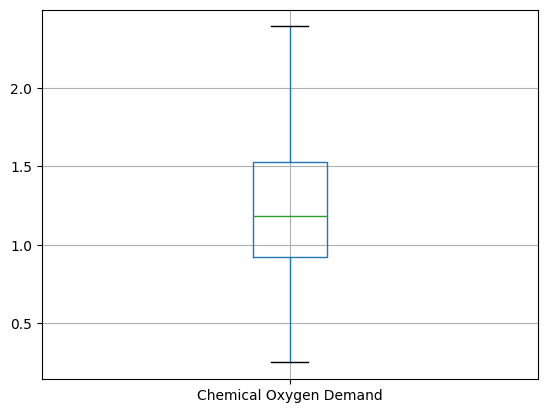

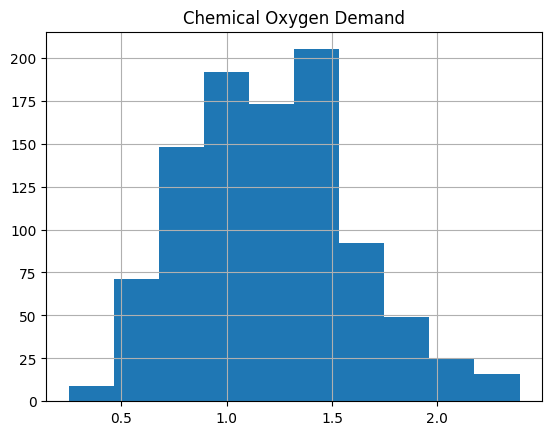

In [147]:
#5.Chemical Oxygen Demand
#IQR5
q1_5 = df['Chemical Oxygen Demand'].quantile(0.25)
q3_5 = df['Chemical Oxygen Demand'].quantile(0.75)
iqr_5 = q3_5 - q1_5
threshold_iqr5 = 1.5 * iqr_5
outliersiqr5 = df[(df['Chemical Oxygen Demand']<q1_5-threshold_iqr5)|(df['Chemical Oxygen Demand']>q3_5+threshold_iqr5)]
#Result5
print("IQR Outliers")
print(outliersiqr5['Chemical Oxygen Demand'])
df.loc[(df['Chemical Oxygen Demand']<q1_5-threshold_iqr5)] = q1_5
df.loc[(df['Chemical Oxygen Demand']>q3_5+threshold_iqr5)] = q3_5
boxplot5a = df.boxplot(column=['Chemical Oxygen Demand'])
hist_5a = df.hist(column=['Chemical Oxygen Demand'])

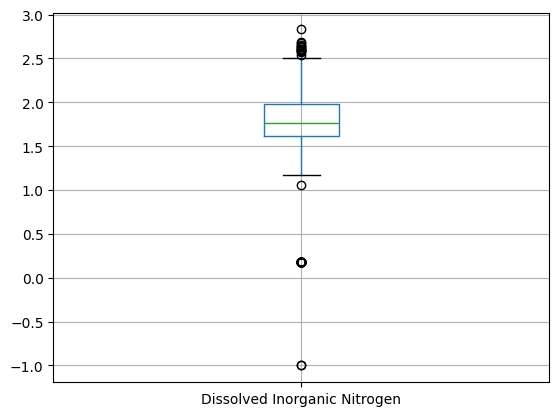

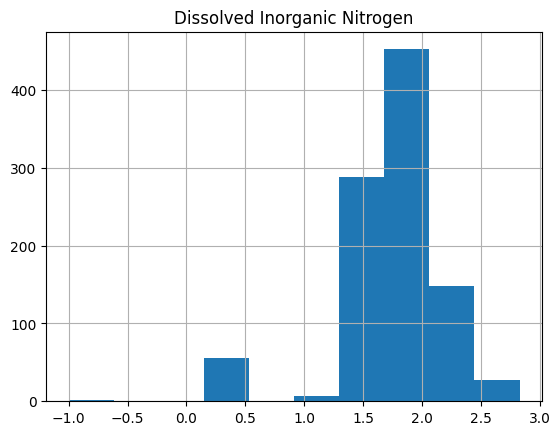

In [148]:
#6.Dissolved Inorganic Nitrogen
df['Dissolved Inorganic Nitrogen'] = np.log10(df['Dissolved Inorganic Nitrogen'])
boxplot6log = df.boxplot(column=['Dissolved Inorganic Nitrogen'])
hist_6log = df.hist(column=['Dissolved Inorganic Nitrogen'])

IQR Outliers
19     0.184691
48     2.606919
59     0.184691
65     0.184691
74     0.184691
         ...   
963    0.184691
964    0.184691
965    0.184691
968    2.679337
973    0.184691
Name: Dissolved Inorganic Nitrogen, Length: 74, dtype: float64


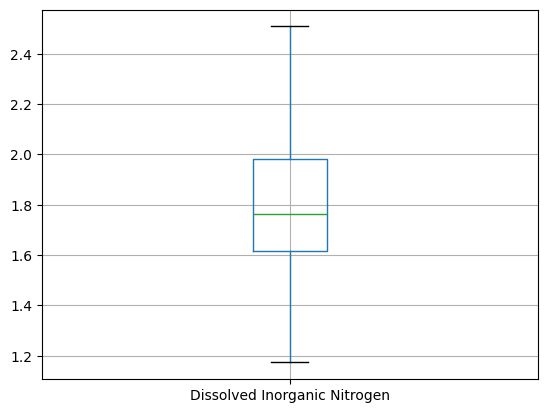

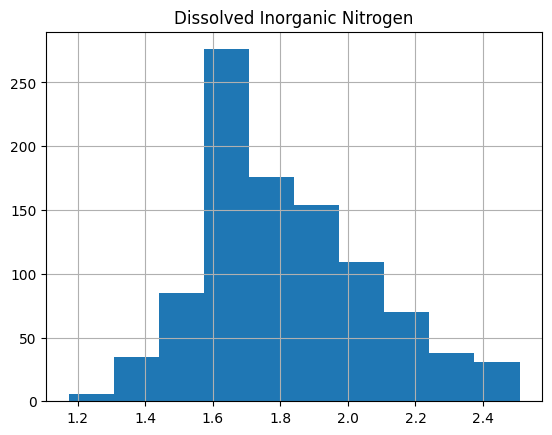

In [149]:
#IQR6
q1_6 = df['Dissolved Inorganic Nitrogen'].quantile(0.25)
q3_6 = df['Dissolved Inorganic Nitrogen'].quantile(0.75)
iqr_6 = q3_6 - q1_6
threshold_iqr6 = 1.5 * iqr_6
outliersiqr6 = df[(df['Dissolved Inorganic Nitrogen']<q1_6-threshold_iqr6)|(df['Dissolved Inorganic Nitrogen']>q3_6+threshold_iqr6)]
#Result6
print("IQR Outliers")
print(outliersiqr6['Dissolved Inorganic Nitrogen'])
df.loc[(df['Dissolved Inorganic Nitrogen']<q1_6-threshold_iqr6)] = q1_6
df.loc[(df['Dissolved Inorganic Nitrogen']>q3_6+threshold_iqr6)] = q3_6
boxplot6a = df.boxplot(column=['Dissolved Inorganic Nitrogen'])
hist_6a = df.hist(column=['Dissolved Inorganic Nitrogen'])

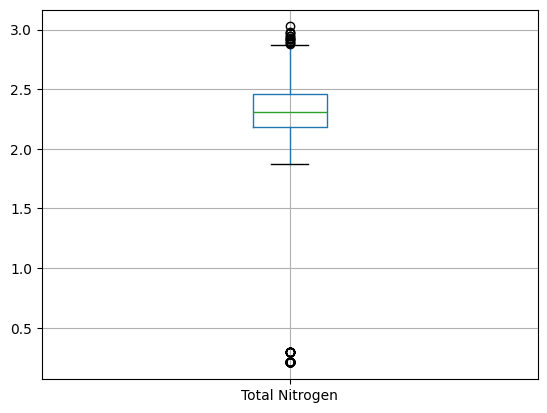

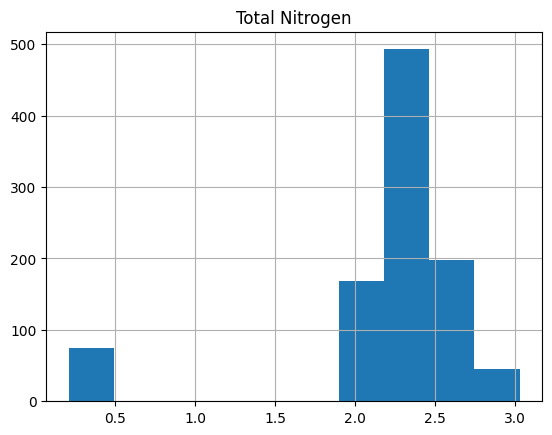

In [150]:
#7.Total Nitrogen
df['Total Nitrogen'] = np.log10(df['Total Nitrogen'])
boxplot7log = df.boxplot(column=['Total Nitrogen'])
hist_7log = df.hist(column=['Total Nitrogen'])

IQR Outliers
19     0.208357
44     2.895699
48     0.296791
59     0.208357
65     0.208357
         ...   
963    0.208357
964    0.208357
965    0.208357
968    0.296791
973    0.208357
Name: Total Nitrogen, Length: 88, dtype: float64


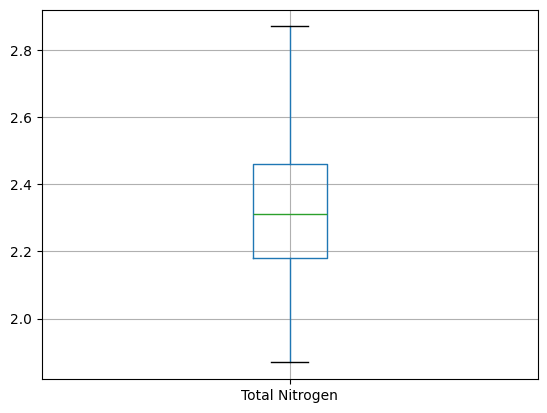

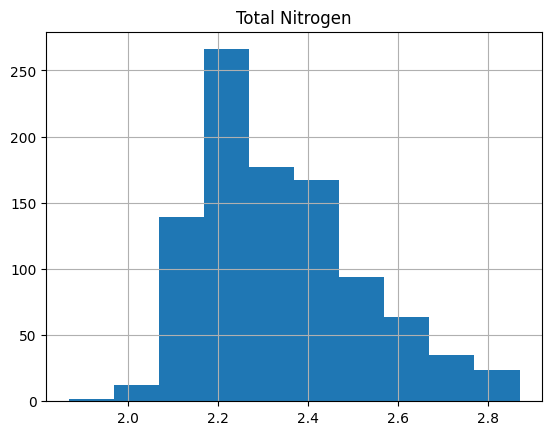

In [151]:
#IQR7
q1_7 = df['Total Nitrogen'].quantile(0.25)
q3_7 = df['Total Nitrogen'].quantile(0.75)
iqr_7 = q3_7 - q1_7
threshold_iqr7 = 1.5 * iqr_7
outliersiqr7 = df[(df['Total Nitrogen']<q1_7-threshold_iqr7)|(df['Total Nitrogen']>q3_7+threshold_iqr7)]
#Result7
print("IQR Outliers")
print(outliersiqr7['Total Nitrogen'])
df.loc[(df['Total Nitrogen']<q1_7-threshold_iqr7)] = q1_7
df.loc[(df['Total Nitrogen']>q3_7+threshold_iqr7)] = q3_7
boxplot7b = df.boxplot(column=['Total Nitrogen'])
hist_7b = df.hist(column=['Total Nitrogen'])

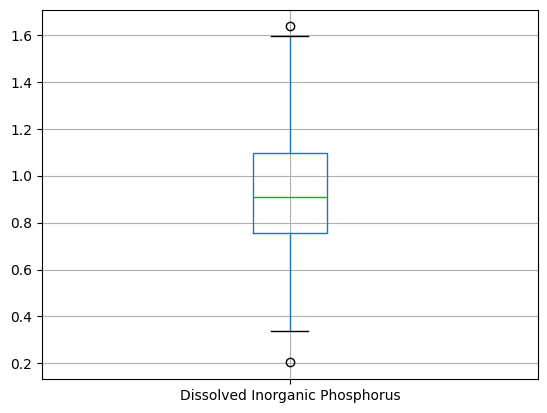

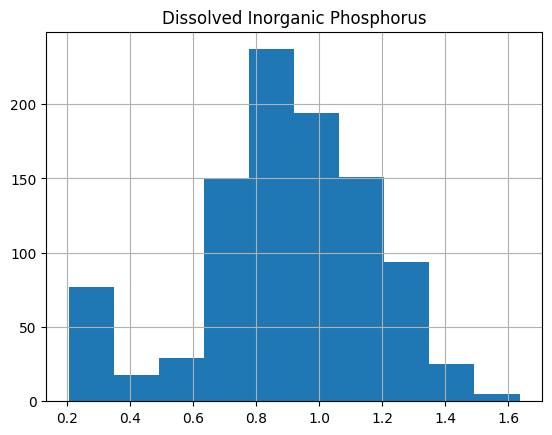

In [152]:
#8.Dissolved Inorganic Phosphorus
df['Dissolved Inorganic Phosphorus'] = np.log10(df['Dissolved Inorganic Phosphorus'])
boxplot8log = df.boxplot(column=['Dissolved Inorganic Phosphorus'])
hist_8log = df.hist(column=['Dissolved Inorganic Phosphorus'])

IQR Outliers
138    1.635484
934    0.204120
Name: Dissolved Inorganic Phosphorus, dtype: float64


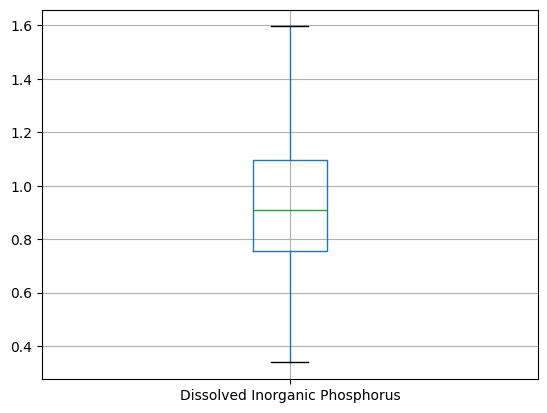

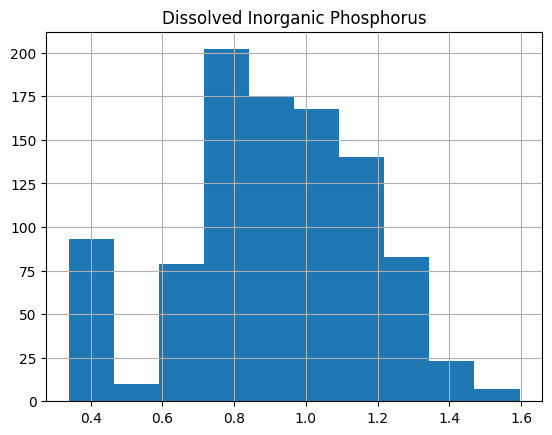

In [153]:
#IQR8
q1_8 = df['Dissolved Inorganic Phosphorus'].quantile(0.25)
q3_8 = df['Dissolved Inorganic Phosphorus'].quantile(0.75)
iqr_8 = q3_8 - q1_8
threshold_iqr8 = 1.5 * iqr_8
outliersiqr8 = df[(df['Dissolved Inorganic Phosphorus']<q1_8-threshold_iqr8)|(df['Dissolved Inorganic Phosphorus']>q3_8+threshold_iqr8)]
#Result8
print("IQR Outliers")
print(outliersiqr8['Dissolved Inorganic Phosphorus'])
df.loc[(df['Dissolved Inorganic Phosphorus']<q1_8-threshold_iqr8)] = df['Dissolved Inorganic Phosphorus'].median()
df.loc[(df['Dissolved Inorganic Phosphorus']>q3_8+threshold_iqr8)] = df['Dissolved Inorganic Phosphorus'].median()
boxplot8a = df.boxplot(column=['Dissolved Inorganic Phosphorus'])
hist_8a = df.hist(column=['Dissolved Inorganic Phosphorus'])

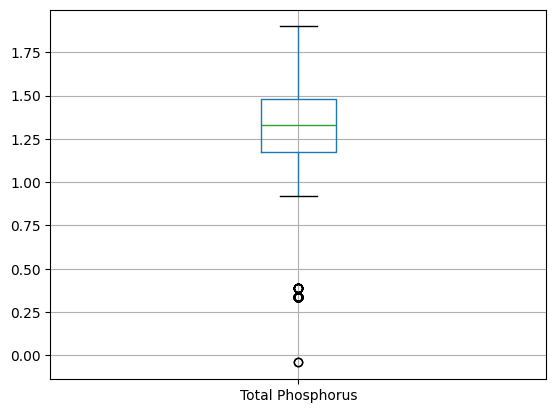

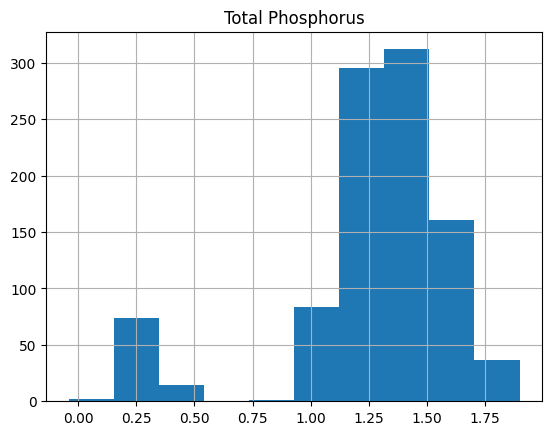

In [154]:
#9.Total Phosphorus
df['Total Phosphorus'] = np.log10(df['Total Phosphorus'])
boxplot9log = df.boxplot(column=['Total Phosphorus'])
hist_9log = df.hist(column=['Total Phosphorus'])

IQR Outliers
19     0.338795
44     0.391272
48     0.338795
59     0.338795
65     0.338795
         ...   
963    0.338795
964    0.338795
965    0.338795
968    0.338795
973    0.338795
Name: Total Phosphorus, Length: 90, dtype: float64


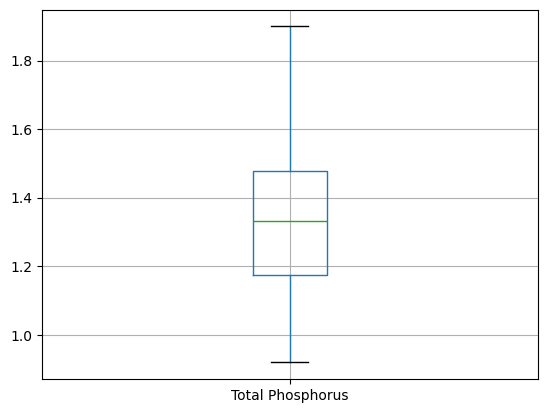

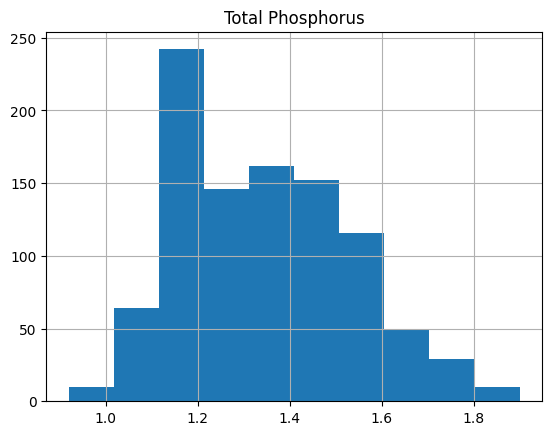

In [155]:
#IQR9
q1_9 = df['Total Phosphorus'].quantile(0.25)
q3_9 = df['Total Phosphorus'].quantile(0.75)
iqr_9 = q3_9 - q1_9
threshold_iqr9 = 1.5 * iqr_9
outliersiqr9 = df[(df['Total Phosphorus']<q1_9-threshold_iqr9)|(df['Total Phosphorus']>q3_9+threshold_iqr9)]
#Result9
print("IQR Outliers")
print(outliersiqr9['Total Phosphorus'])
df.loc[(df['Total Phosphorus']<q1_9-threshold_iqr9)] = q1_9
df.loc[(df['Total Phosphorus']>q3_9+threshold_iqr9)] = q3_9
boxplot9a = df.boxplot(column=['Total Phosphorus'])
hist_9a = df.hist(column=['Total Phosphorus'])

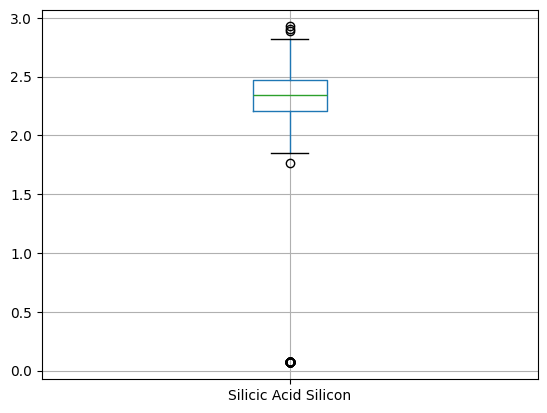

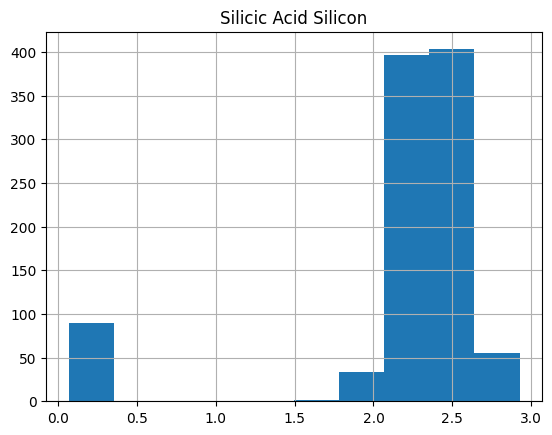

In [156]:
#10.Silicic Acid Silicon
df['Silicic Acid Silicon'] = np.log10(df['Silicic Acid Silicon'])
boxplot10log = df.boxplot(column=['Silicic Acid Silicon'])
hist_10log = df.hist(column=['Silicic Acid Silicon'])

IQR Outliers
19     0.069367
44     0.069367
48     0.069367
59     0.069367
65     0.069367
         ...   
963    0.069367
964    0.069367
965    0.069367
968    0.069367
973    0.069367
Name: Silicic Acid Silicon, Length: 94, dtype: float64


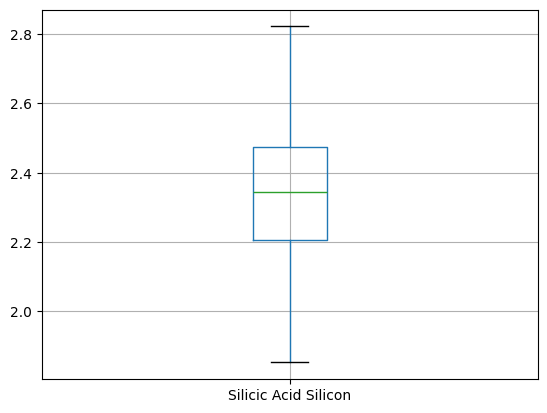

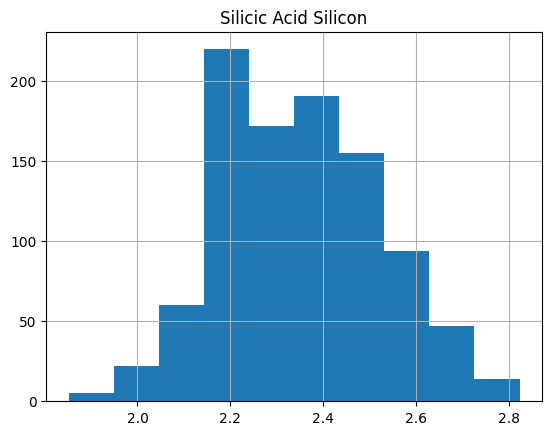

In [157]:
#IQR10
q1_10 = df['Silicic Acid Silicon'].quantile(0.25)
q3_10 = df['Silicic Acid Silicon'].quantile(0.75)
iqr_10 = q3_10 - q1_10
threshold_iqr10 = 1.5 * iqr_10
outliersiqr10 = df[(df['Silicic Acid Silicon']<q1_10-threshold_iqr10)|(df['Silicic Acid Silicon']>q3_10+threshold_iqr10)]
#Result10
print("IQR Outliers")
print(outliersiqr10['Silicic Acid Silicon'])
df.loc[(df['Silicic Acid Silicon']<q1_10-threshold_iqr10)] = q1_10
df.loc[(df['Silicic Acid Silicon']>q3_10+threshold_iqr10)] = q3_10
boxplot10a = df.boxplot(column=['Silicic Acid Silicon'])
hist_10a = df.hist(column=['Silicic Acid Silicon'])

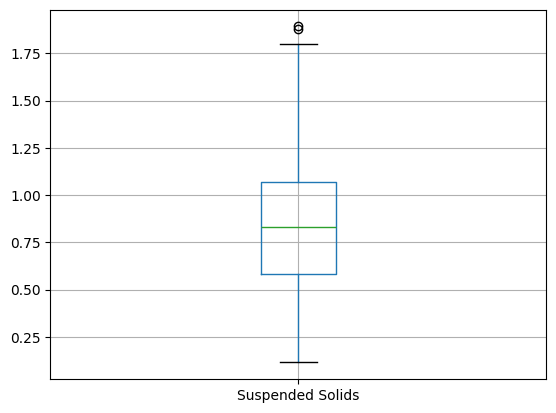

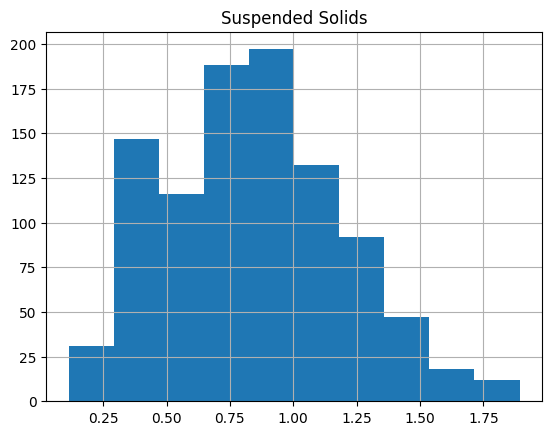

In [158]:
#11.Suspended Solids
df['Suspended Solids'] = np.log10(df['Suspended Solids'])
boxplot11log = df.boxplot(column=['Suspended Solids'])
hist_11log = df.hist(column=['Suspended Solids'])

IQR Outliers
623    1.892651
627    1.876795
Name: Suspended Solids, dtype: float64


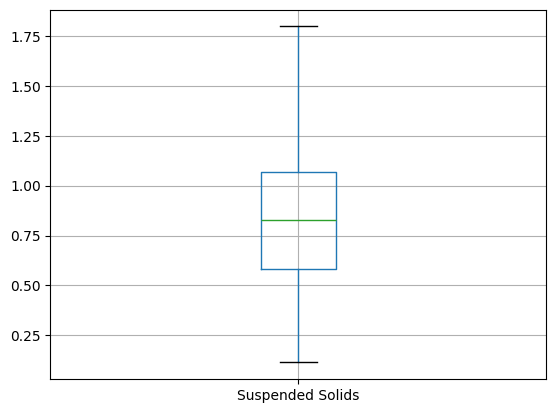

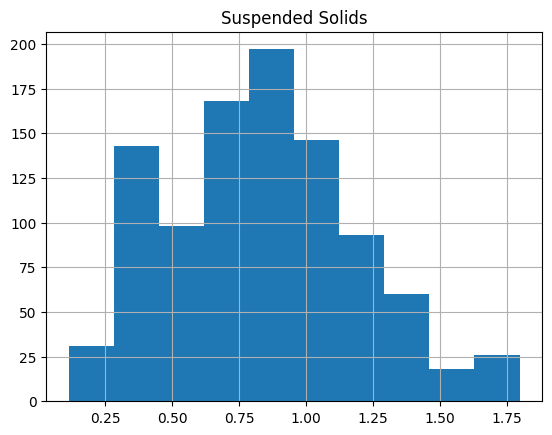

In [159]:
#IQR11
q1_11 = df['Suspended Solids'].quantile(0.25)
q3_11 = df['Suspended Solids'].quantile(0.75)
iqr_11 = q3_11 - q1_11
threshold_iqr11 = 1.5 * iqr_11
outliersiqr11 = df[(df['Suspended Solids']<q1_11-threshold_iqr11)|(df['Suspended Solids']>q3_11+threshold_iqr11)]
#Result11
print("IQR Outliers")
print(outliersiqr11['Suspended Solids'])
df.loc[(df['Suspended Solids']<q1_11-threshold_iqr11)] = q1_11
df.loc[(df['Suspended Solids']>q3_11+threshold_iqr11)] = q3_11
boxplot11a = df.boxplot(column=['Suspended Solids'])
hist_11a = df.hist(column=['Suspended Solids'])

IQR Outliers
17     4.84
25     7.08
26     5.38
36     7.43
37     7.72
       ... 
947    5.66
971    6.60
972    6.70
974    6.51
975    7.24
Name: Chlorophyll, Length: 79, dtype: float64


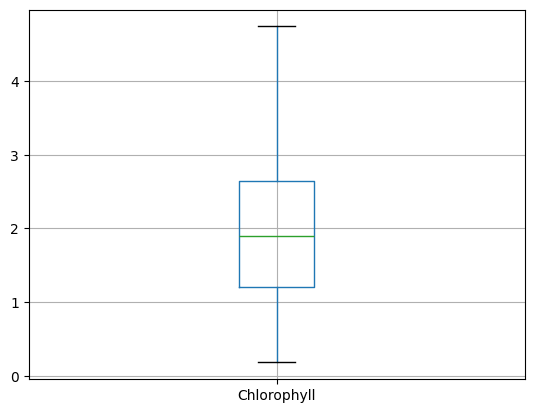

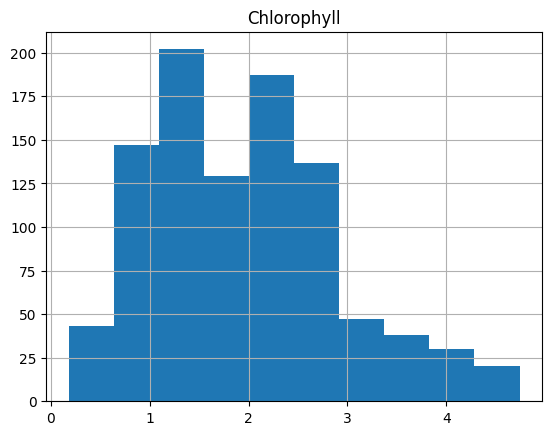

In [160]:
#12.Chlorophyll
#IQR12
q1_12 = df['Chlorophyll'].quantile(0.25)
q3_12 = df['Chlorophyll'].quantile(0.75)
iqr_12 = q3_12 - q1_12
threshold_iqr12 = 1.5 * iqr_12
outliersiqr12 = df[(df['Chlorophyll']<q1_12-threshold_iqr12)|(df['Chlorophyll']>q3_12+threshold_iqr12)]
#Result12
print("IQR Outliers")
print(outliersiqr12['Chlorophyll'])
df.loc[(df['Chlorophyll']<q1_12-threshold_iqr12)] = q1_12
df.loc[(df['Chlorophyll']>q3_12+threshold_iqr12)] = q3_12
boxplot12a = df.boxplot(column=['Chlorophyll'])
hist_12a = df.hist(column=['Chlorophyll'])

In [161]:
df.skew()

,0
Temperature,-1.368275
Salinity,-0.584294
Hydrogen ion concentration,-1.686913
Dissolved Oxygen,-1.551916
Chemical Oxygen Demand,0.736962
Dissolved Inorganic Nitrogen,0.618676
Total Nitrogen,-0.033517
Dissolved Inorganic Phosphorus,1.411619
Total Phosphorus,1.373620
Silicic Acid Silicon,-0.483313


In [162]:
df

,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
0,13.38,2.403421e+19,8.05,9.02,0.56,1.837588,2.344981,1.053078,1.481443,2.236789,0.740363,0.77
1,12.88,2.192288e+19,8.10,8.86,0.58,1.834421,2.251151,1.012837,1.389166,2.202216,0.568202,0.91
2,13.03,2.200731e+19,8.11,9.14,0.64,1.801404,2.269046,0.919078,1.285557,2.178401,0.544068,1.21
3,13.05,2.209204e+19,8.04,8.74,0.85,1.853090,2.330414,1.060698,1.491362,2.303196,0.568202,1.13
4,13.65,2.200731e+19,8.03,8.52,0.92,1.857332,2.297761,1.123852,1.615950,2.311754,0.643453,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...
975,2.64,2.640000e+00,2.64,2.64,2.64,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.64
976,15.92,9.037154e+18,8.11,8.85,1.39,1.943000,2.334655,1.136721,1.475671,2.462248,1.198657,4.49
977,15.51,8.963162e+18,8.06,8.94,1.20,2.078094,2.356026,1.212188,1.440909,2.401573,1.269513,3.18
978,15.40,7.046068e+18,8.07,9.16,1.42,2.215902,2.449324,1.290035,1.511883,2.482016,1.307496,2.09


# **4. Feature Engineering**

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature                     980 non-null    float64
 1   Salinity                        980 non-null    float64
 2   Hydrogen ion concentration      980 non-null    float64
 3   Dissolved Oxygen                980 non-null    float64
 4   Chemical Oxygen Demand          980 non-null    float64
 5   Dissolved Inorganic Nitrogen    980 non-null    float64
 6   Total Nitrogen                  980 non-null    float64
 7   Dissolved Inorganic Phosphorus  980 non-null    float64
 8   Total Phosphorus                980 non-null    float64
 9   Silicic Acid Silicon            980 non-null    float64
 10  Suspended Solids                980 non-null    float64
 11  Chlorophyll                     980 non-null    float64
dtypes: float64(12)
memory usage: 92.0 KB

In [164]:
df

,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
0,13.38,2.403421e+19,8.05,9.02,0.56,1.837588,2.344981,1.053078,1.481443,2.236789,0.740363,0.77
1,12.88,2.192288e+19,8.10,8.86,0.58,1.834421,2.251151,1.012837,1.389166,2.202216,0.568202,0.91
2,13.03,2.200731e+19,8.11,9.14,0.64,1.801404,2.269046,0.919078,1.285557,2.178401,0.544068,1.21
3,13.05,2.209204e+19,8.04,8.74,0.85,1.853090,2.330414,1.060698,1.491362,2.303196,0.568202,1.13
4,13.65,2.200731e+19,8.03,8.52,0.92,1.857332,2.297761,1.123852,1.615950,2.311754,0.643453,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...
975,2.64,2.640000e+00,2.64,2.64,2.64,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.64
976,15.92,9.037154e+18,8.11,8.85,1.39,1.943000,2.334655,1.136721,1.475671,2.462248,1.198657,4.49
977,15.51,8.963162e+18,8.06,8.94,1.20,2.078094,2.356026,1.212188,1.440909,2.401573,1.269513,3.18
978,15.40,7.046068e+18,8.07,9.16,1.42,2.215902,2.449324,1.290035,1.511883,2.482016,1.307496,2.09


In [165]:
df.describe()

,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
count,980.000000,9.800000e+02,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,14.070981,1.386963e+19,7.112481,7.510594,1.368185,1.908320,2.346401,1.205703,1.531901,2.363428,0.957906,1.953379
std,5.687971,8.204361e+18,2.205600,2.433242,0.598341,0.333768,0.195905,0.595450,0.446452,0.187666,0.597792,0.944228
min,1.069110,1.069110e+00,1.069110,1.069110,0.250000,1.069110,1.069110,0.342423,0.973128,1.069110,0.113943,0.180000
25%,13.925000,8.042559e+18,8.010000,7.927500,0.920000,1.658965,2.204323,0.812913,1.225309,2.209448,0.591065,1.210000
50%,16.170000,1.670423e+19,8.130000,8.470000,1.220000,1.840733,2.309736,0.995635,1.390935,2.347818,0.835679,1.900000
75%,17.400000,2.063203e+19,8.180000,8.900000,1.700000,2.175945,2.479215,1.251028,1.594393,2.505489,1.110590,2.640000
max,20.790000,2.850798e+19,8.360000,10.040000,2.640000,2.640000,2.870462,2.640000,2.640000,2.815910,2.640000,4.740000


Normalization

In [166]:
df['Temperature'] = (df['Temperature']-df['Temperature'].min())/(df['Temperature'].max()-df['Temperature'].min())
df['Salinity'] = (df['Salinity']-df['Salinity'].min())/(df['Salinity'].max()-df['Salinity'].min())
df['Hydrogen ion concentration'] = (df['Hydrogen ion concentration']-df['Hydrogen ion concentration'].min())/(df['Hydrogen ion concentration'].max()-df['Hydrogen ion concentration'].min())
df['Dissolved Oxygen'] = (df['Dissolved Oxygen']-df['Dissolved Oxygen'].min())/(df['Dissolved Oxygen'].max()-df['Dissolved Oxygen'].min())
df['Chemical Oxygen Demand'] = (df['Chemical Oxygen Demand']-df['Chemical Oxygen Demand'].min())/(df['Chemical Oxygen Demand'].max()-df['Chemical Oxygen Demand'].min())
df['Dissolved Inorganic Nitrogen'] = (df['Dissolved Inorganic Nitrogen']-df['Dissolved Inorganic Nitrogen'].min())/(df['Dissolved Inorganic Nitrogen'].max()-df['Dissolved Inorganic Nitrogen'].min())
df['Total Nitrogen'] = (df['Total Nitrogen']-df['Total Nitrogen'].min())/(df['Total Nitrogen'].max()-df['Total Nitrogen'].min())
df['Dissolved Inorganic Phosphorus'] = (df['Dissolved Inorganic Phosphorus']-df['Dissolved Inorganic Phosphorus'].min())/(df['Dissolved Inorganic Phosphorus'].max()-df['Dissolved Inorganic Phosphorus'].min())
df['Total Phosphorus'] = (df['Total Phosphorus']-df['Total Phosphorus'].min())/(df['Total Phosphorus'].max()-df['Total Phosphorus'].min())
df['Silicic Acid Silicon'] = (df['Silicic Acid Silicon']-df['Silicic Acid Silicon'].min())/(df['Silicic Acid Silicon'].max()-df['Silicic Acid Silicon'].min())
df['Suspended Solids'] = (df['Suspended Solids']-df['Suspended Solids'].min())/(df['Suspended Solids'].max()-df['Suspended Solids'].min())
df['Chlorophyll'] = (df['Chlorophyll']-df['Chlorophyll'].min())/(df['Chlorophyll'].max()-df['Chlorophyll'].min())

In [167]:
df.describe()

,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.659294,0.486517,0.828893,0.718043,0.467860,0.534226,0.709073,0.375735,0.335223,0.740965,0.334103,0.388899
std,0.288424,0.287792,0.302514,0.271237,0.250352,0.212471,0.108755,0.259164,0.267838,0.107434,0.236650,0.207068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.651892,0.282116,0.951995,0.764516,0.280335,0.375491,0.630201,0.204777,0.151290,0.652816,0.188880,0.225877
50%,0.765731,0.585949,0.968454,0.824989,0.405858,0.491201,0.688719,0.284305,0.250653,0.732029,0.285716,0.377193
75%,0.828101,0.723728,0.975312,0.872922,0.606695,0.704591,0.782804,0.395462,0.372713,0.822292,0.394546,0.539474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
df.corr()

,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
Temperature,1.000000,0.805557,0.959605,0.911121,-0.782335,-0.700408,-0.152351,-0.919163,-0.897748,-0.020975,-0.346349,-0.257450
Salinity,0.805557,1.000000,0.791655,0.751365,-0.805341,-0.759187,-0.322507,-0.844512,-0.834496,-0.279383,-0.438497,-0.467654
Hydrogen ion concentration,0.959605,0.791655,1.000000,0.981600,-0.789003,-0.667379,-0.088370,-0.923427,-0.890412,-0.049516,-0.307017,-0.215805
Dissolved Oxygen,0.911121,0.751365,0.981600,1.000000,-0.757907,-0.643583,-0.074360,-0.902697,-0.859034,-0.086271,-0.283629,-0.163774
Chemical Oxygen Demand,-0.782335,-0.805341,-0.789003,-0.757907,1.000000,0.628660,0.195747,0.834416,0.823387,0.229163,0.507161,0.386597
Dissolved Inorganic Nitrogen,-0.700408,-0.759187,-0.667379,-0.643583,0.628660,1.000000,0.640362,0.831583,0.834948,0.535575,0.581454,0.342089
Total Nitrogen,-0.152351,-0.322507,-0.088370,-0.074360,0.195747,0.640362,1.000000,0.345323,0.430507,0.622014,0.506518,0.326474
Dissolved Inorganic Phosphorus,-0.919163,-0.844512,-0.923427,-0.902697,0.834416,0.831583,0.345323,1.000000,0.972458,0.311236,0.513994,0.323592
Total Phosphorus,-0.897748,-0.834496,-0.890412,-0.859034,0.823387,0.834948,0.430507,0.972458,1.000000,0.330774,0.560145,0.378467
Silicic Acid Silicon,-0.020975,-0.279383,-0.049516,-0.086271,0.229163,0.535575,0.622014,0.311236,0.330774,1.000000,0.535775,0.293781


<Axes: >

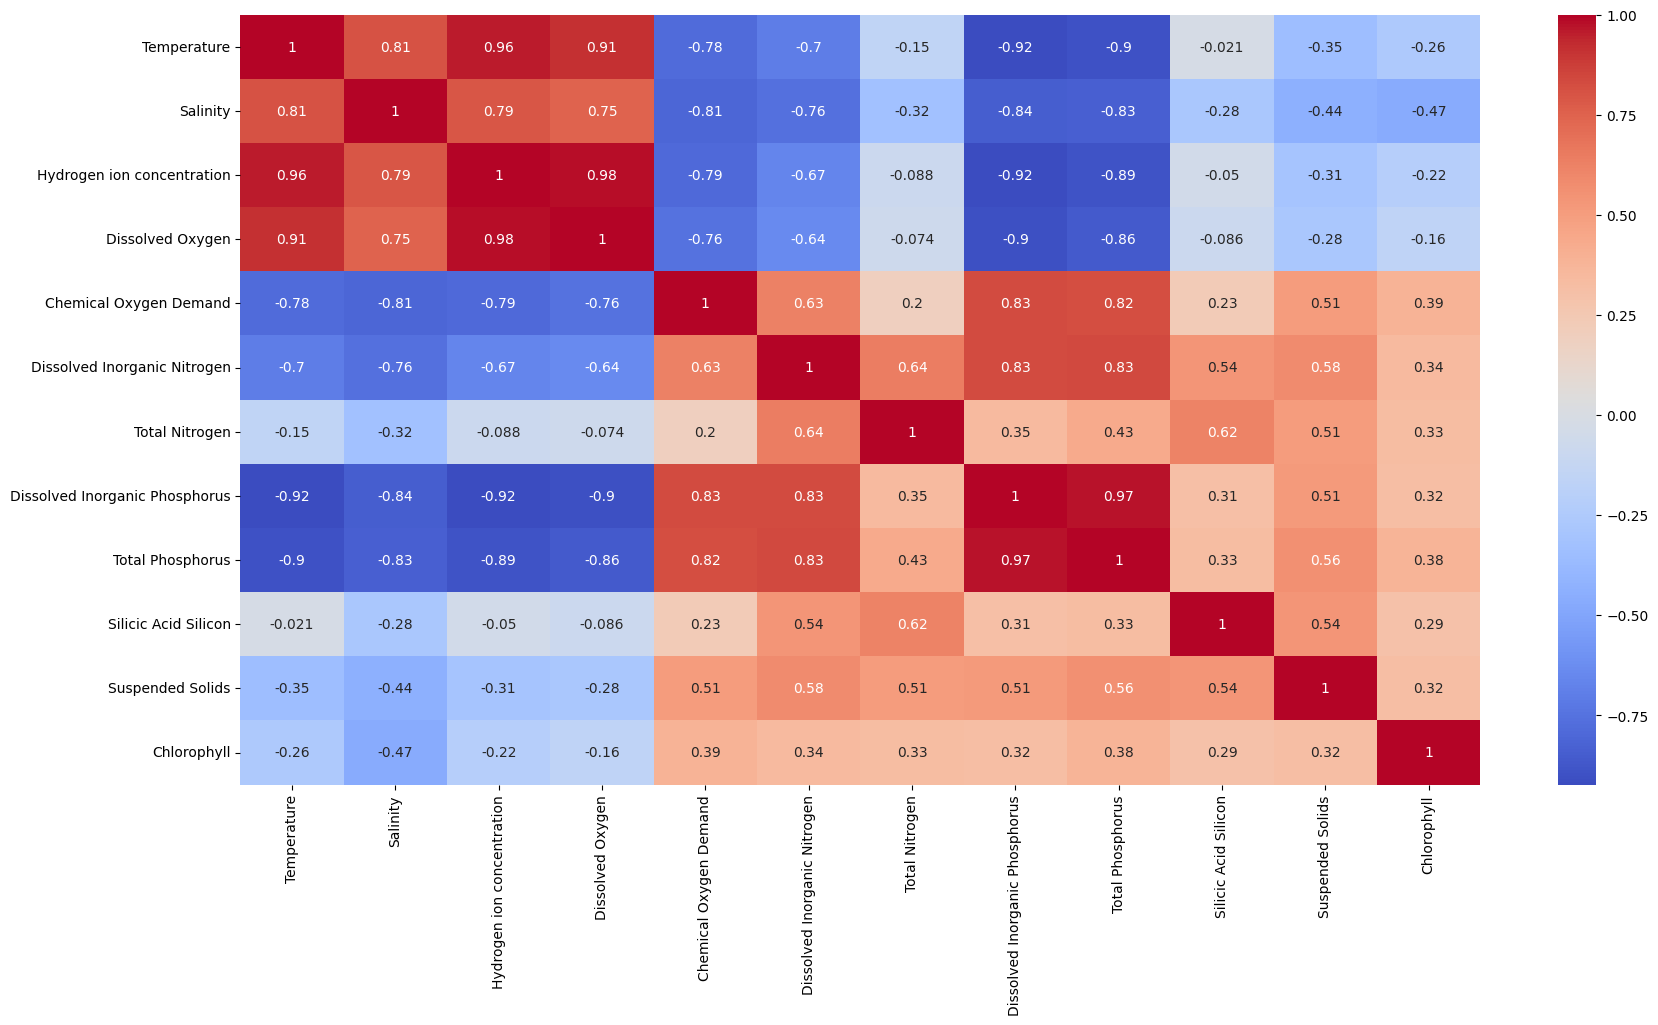

In [169]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# **5. Model Selection**

In [170]:
dfs = df.copy()

In [171]:
dfs

,Temperature,Salinity,Hydrogen ion concentration,Dissolved Oxygen,Chemical Oxygen Demand,Dissolved Inorganic Nitrogen,Total Nitrogen,Dissolved Inorganic Phosphorus,Total Phosphorus,Silicic Acid Silicon,Suspended Solids,Chlorophyll
0,0.624256,8.430694e-01,0.957481,0.886299,0.129707,0.489199,0.708285,0.309307,0.304951,0.668468,0.247983,0.129386
1,0.598902,7.690085e-01,0.964339,0.868463,0.138075,0.487183,0.656197,0.291792,0.249592,0.648675,0.179829,0.160088
2,0.606509,7.719702e-01,0.965711,0.899676,0.163180,0.466165,0.666130,0.250984,0.187435,0.635042,0.170275,0.225877
3,0.607523,7.749424e-01,0.956110,0.855087,0.251046,0.499067,0.700198,0.312623,0.310902,0.706484,0.179829,0.208333
4,0.637947,7.719702e-01,0.954738,0.830563,0.280335,0.501768,0.682071,0.340110,0.385646,0.711383,0.209619,0.182018
...,...,...,...,...,...,...,...,...,...,...,...,...
975,0.079656,5.510351e-20,0.215459,0.175110,1.000000,1.000000,0.872061,1.000000,1.000000,0.899296,1.000000,0.539474
976,0.753054,3.170043e-01,0.965711,0.867349,0.476987,0.556302,0.702553,0.345711,0.301489,0.797538,0.429410,0.945175
977,0.732264,3.144088e-01,0.958853,0.877381,0.397490,0.642301,0.714416,0.378557,0.280634,0.762802,0.457460,0.657895
978,0.726686,2.471612e-01,0.960224,0.901905,0.489540,0.730027,0.766210,0.412440,0.323213,0.808854,0.472496,0.418860


In [172]:
dfs.columns

Index(['Temperature', 'Salinity', 'Hydrogen ion concentration',
       'Dissolved Oxygen', 'Chemical Oxygen Demand',
       'Dissolved Inorganic Nitrogen', 'Total Nitrogen',
       'Dissolved Inorganic Phosphorus', 'Total Phosphorus',
       'Silicic Acid Silicon', 'Suspended Solids', 'Chlorophyll'],
      dtype='object')

In [173]:
x = dfs[['Temperature','Salinity','Hydrogen ion concentration',
          'Dissolved Oxygen','Chemical Oxygen Demand',
          'Dissolved Inorganic Nitrogen','Total Nitrogen',
          'Dissolved Inorganic Phosphorus','Total Phosphorus',
          'Suspended Solids','Chlorophyll']]

In [174]:
y = dfs['Silicic Acid Silicon']

Scatter plots of X variables and Y variable Relation

<Axes: xlabel='Temperature'>

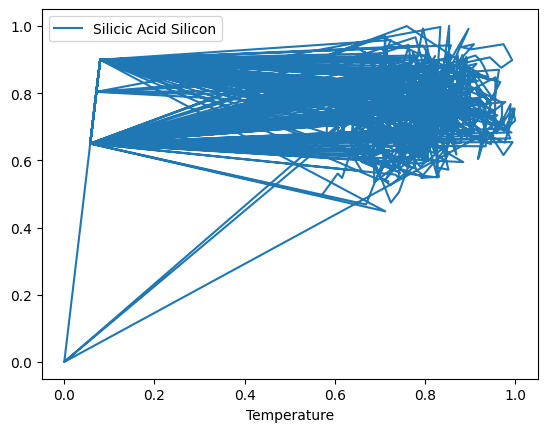

In [175]:
dfs.plot(x='Temperature',y='Silicic Acid Silicon')

<Axes: xlabel='Salinity'>

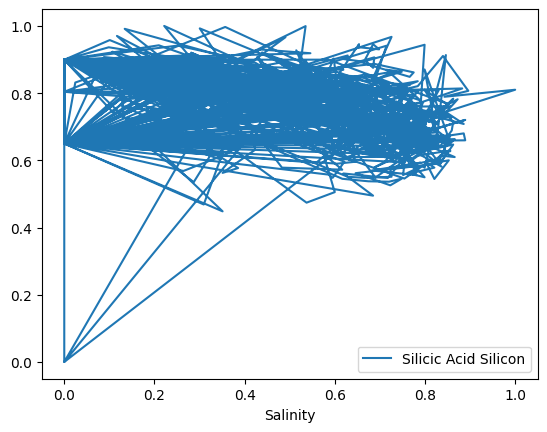

In [176]:
dfs.plot(x='Salinity',y='Silicic Acid Silicon')

<Axes: xlabel='Hydrogen ion concentration'>

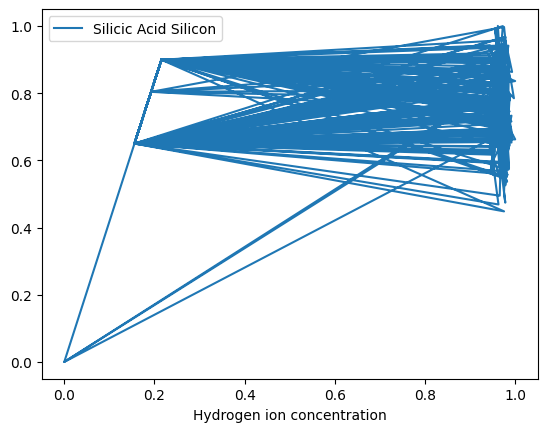

In [177]:
dfs.plot(x='Hydrogen ion concentration',y='Silicic Acid Silicon')

<Axes: xlabel='Dissolved Oxygen'>

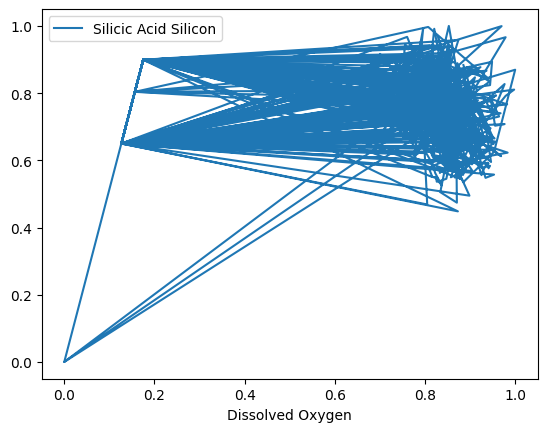

In [178]:
dfs.plot(x='Dissolved Oxygen',y='Silicic Acid Silicon')

<Axes: xlabel='Chemical Oxygen Demand'>

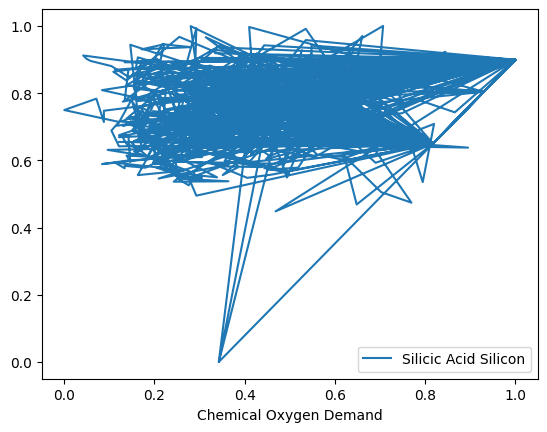

In [179]:
dfs.plot(x='Chemical Oxygen Demand',y='Silicic Acid Silicon')

<Axes: xlabel='Dissolved Inorganic Nitrogen'>

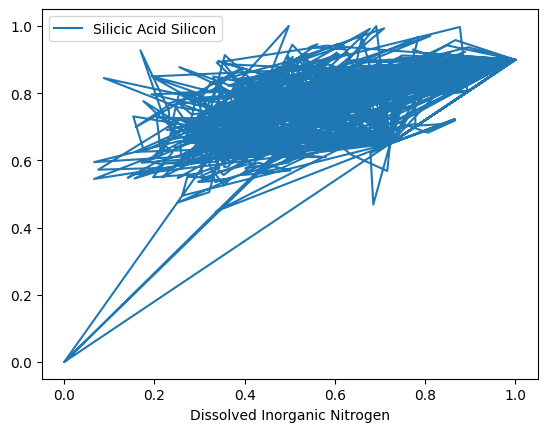

In [180]:
dfs.plot(x='Dissolved Inorganic Nitrogen',y='Silicic Acid Silicon')

<Axes: xlabel='Total Nitrogen'>

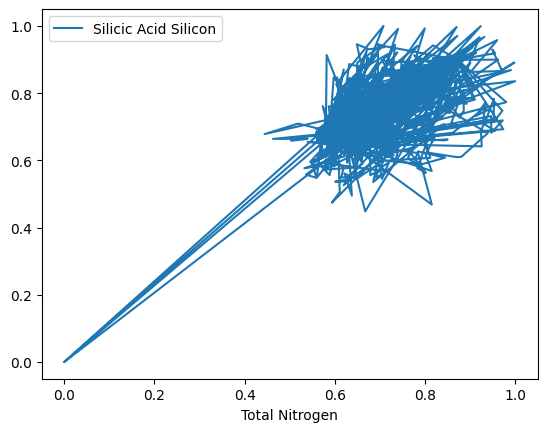

In [181]:
dfs.plot(x='Total Nitrogen',y='Silicic Acid Silicon')

<Axes: xlabel='Dissolved Inorganic Phosphorus'>

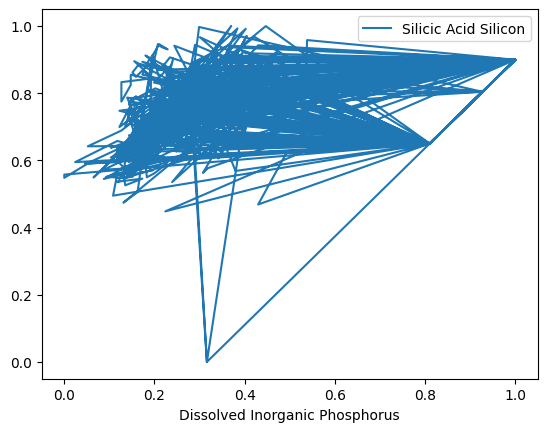

In [182]:
dfs.plot(x='Dissolved Inorganic Phosphorus',y='Silicic Acid Silicon')

<Axes: xlabel='Total Phosphorus'>

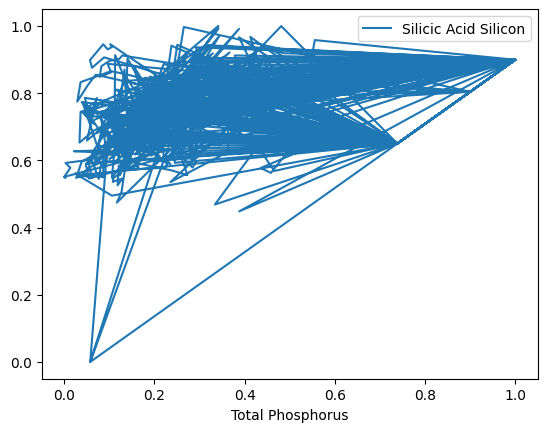

In [183]:
dfs.plot(x='Total Phosphorus',y='Silicic Acid Silicon')

<Axes: xlabel='Suspended Solids'>

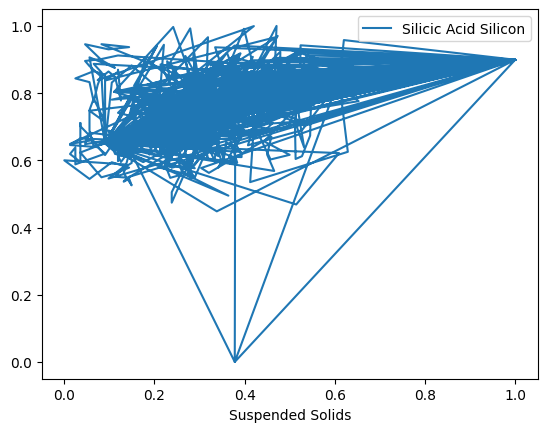

In [184]:
dfs.plot(x='Suspended Solids',y='Silicic Acid Silicon')

<Axes: xlabel='Chlorophyll'>

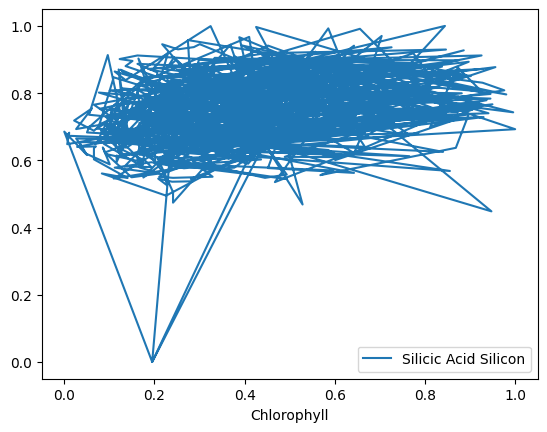

In [185]:
dfs.plot(x='Chlorophyll',y='Silicic Acid Silicon')

In [186]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [187]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(735, 11) (735,)
(245, 11) (245,)


DecisionTreeRegressor()

In [188]:
m1 = tree.DecisionTreeRegressor()
m1.fit(x_train,y_train)
y1_pred = m1.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y1_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y1_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y1_pred),4))

Mean Absolute Error:  0.0451
Mean Squared Error:  0.0048
Coefficient of Determination:  0.4925


GradientBoostingRegressor()

In [189]:
m2 = GradientBoostingRegressor()
m2.fit(x_train,y_train)
y2_pred = m2.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y2_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y2_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y2_pred),4))

Mean Absolute Error:  0.0334
Mean Squared Error:  0.0024
Coefficient of Determination:  0.7437


RandomForestRegressor()

In [190]:
m3 = RandomForestRegressor()
m3.fit(x_train,y_train)
y3_pred = m3.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y3_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y3_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y3_pred),4))

Mean Absolute Error:  0.0314
Mean Squared Error:  0.0022
Coefficient of Determination:  0.7704


XGBRegressor()

In [191]:
m4 = xg.XGBRegressor()
m4.fit(x_train,y_train)
y4_pred = m4.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y4_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y4_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y4_pred),4))

Mean Absolute Error:  0.0327
Mean Squared Error:  0.0025
Coefficient of Determination:  0.7305


# **6. Hyperparameter Tuning**

GridsearchCV with Models

In [192]:
#DecisionTreeRegressor()
parameter_grid1 = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
                   'splitter': ['best','random'],
                   'random_state': [None,0,42]}
#GradientBoostingRegressor()
parameter_grid2 = {'loss': ['squared_error','absolute_error','huber','quantile'],
                   'criterion': ['friedman_mse','squared_error'],
                   'random_state': [None,0,42]}
#RandomForestRegressor()
parameter_grid3 = {'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
                  'random_state': [None,0,42]}
#XGBRegressor()
parameter_grid4 = {'booster': ['gbtree','gblinear','dart'],
                  'random_state': [None,0,42]}

DecisionTreeRegressor()

In [193]:
grid_model1 = tree.DecisionTreeRegressor()
grid_search1 = GridSearchCV(grid_model1,parameter_grid1,scoring='r2')
grid_search1.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'random_state': [None, 0, 42],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [194]:
grid_search1.best_params_

{'criterion': 'squared_error', 'random_state': 0, 'splitter': 'best'}

In [195]:
m5 = tree.DecisionTreeRegressor(**grid_search1.best_params_)
m5.fit(x_train,y_train)
y5_pred = m5.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y5_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y5_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y5_pred),4))

Mean Absolute Error:  0.0444
Mean Squared Error:  0.0045
Coefficient of Determination:  0.5176


GradientBoostingRegressor()

In [196]:
grid_model2 = GradientBoostingRegressor()
grid_search2 = GridSearchCV(grid_model2,parameter_grid2,scoring='r2')
grid_search2.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'random_state': [None, 0, 42]},
             scoring='r2')

In [197]:
grid_search2.best_params_

{'criterion': 'friedman_mse', 'loss': 'squared_error', 'random_state': 42}

In [198]:
m6 = GradientBoostingRegressor(**grid_search2.best_params_)
m6.fit(x_train,y_train)
y6_pred = m6.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y6_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y6_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y6_pred),4))

Mean Absolute Error:  0.034
Mean Squared Error:  0.0025
Coefficient of Determination:  0.7358


RandomForestRegressor()

In [199]:
grid_model3 = RandomForestRegressor()
grid_search3 = GridSearchCV(grid_model3,parameter_grid3,scoring='r2')
grid_search3.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'random_state': [None, 0, 42]},
             scoring='r2')

In [200]:
grid_search3.best_params_

{'criterion': 'friedman_mse', 'random_state': None}

In [201]:
m7 = RandomForestRegressor(**grid_search3.best_params_)
m7.fit(x_train,y_train)
y7_pred = m7.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y7_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y7_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y7_pred),4))

Mean Absolute Error:  0.0314
Mean Squared Error:  0.0022
Coefficient of Determination:  0.77


XGBRegressor()

In [202]:
grid_model4 = xg.XGBRegressor()
grid_search4 = GridSearchCV(grid_model4,parameter_grid4,scoring='r2')
grid_search4.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'random_state': [None, 0, 42]},
             scoring='r2')

In [203]:
grid_search4.best_params_

{'booster': 'gbtree', 'random_state': None}

In [204]:
m8 = xg.XGBRegressor(**grid_search4.best_params_)
m8.fit(x_train,y_train)
y8_pred = m8.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y8_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y8_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y8_pred),4))

Mean Absolute Error:  0.0327
Mean Squared Error:  0.0025
Coefficient of Determination:  0.7305


RandomizedSearchCV with Models

DecisionTreeRegressor()

In [205]:
random_model1 = tree.DecisionTreeRegressor()
random_search1 = RandomizedSearchCV(random_model1,parameter_grid1,scoring='r2')
random_search1.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'random_state': [None, 0, 42],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [206]:
random_search1.best_params_

{'splitter': 'best', 'random_state': 42, 'criterion': 'friedman_mse'}

In [207]:
m9 = tree.DecisionTreeRegressor(**random_search1.best_params_)
m9.fit(x_train,y_train)
y9_pred = m9.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y9_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y9_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y9_pred),4))

Mean Absolute Error:  0.0433
Mean Squared Error:  0.0044
Coefficient of Determination:  0.5306


GradientBoostingRegressor()

In [208]:
random_model2 = GradientBoostingRegressor()
random_search2 = RandomizedSearchCV(random_model2,parameter_grid2,scoring='r2')
random_search2.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'random_state': [None, 0, 42]},
                   scoring='r2')

In [209]:
random_search2.best_params_

{'random_state': 42, 'loss': 'squared_error', 'criterion': 'squared_error'}

In [210]:
m10 = GradientBoostingRegressor(**random_search2.best_params_)
m10.fit(x_train,y_train)
y10_pred = m10.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y10_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y10_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y10_pred),4))

Mean Absolute Error:  0.034
Mean Squared Error:  0.0025
Coefficient of Determination:  0.7358


RandomForestRegressor()

In [211]:
random_model3 = RandomForestRegressor()
random_search3 = RandomizedSearchCV(random_model3,parameter_grid3,scoring='r2')
random_search3.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'random_state': [None, 0, 42]},
                   scoring='r2')

In [212]:
random_search3.best_params_

{'random_state': 0, 'criterion': 'absolute_error'}

In [213]:
m11 = RandomForestRegressor(**random_search3.best_params_)
m11.fit(x_train,y_train)
y11_pred = m11.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y11_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y11_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y11_pred),4))

Mean Absolute Error:  0.032
Mean Squared Error:  0.0022
Coefficient of Determination:  0.7652


XGBRegressor()


In [214]:
random_model4 = xg.XGBRegressor()
random_search4 = RandomizedSearchCV(random_model4,parameter_grid4,scoring='r2')
random_search4.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'random_state': [None, 0, 42]},
                   scoring='r2')

In [215]:
random_search4.best_params_

{'random_state': None, 'booster': 'gbtree'}

In [216]:
m12 = xg.XGBRegressor(**random_search4.best_params_)
m12.fit(x_train,y_train)
y12_pred = m12.predict(x_test)
print("Mean Absolute Error: ",round(mean_absolute_error(y_test,y12_pred),4))
print("Mean Squared Error: ",round(mean_squared_error(y_test,y12_pred),4))
print("Coefficient of Determination: ",round(r2_score(y_test,y12_pred),4))

Mean Absolute Error:  0.0327
Mean Squared Error:  0.0025
Coefficient of Determination:  0.7305


# **7. Model Evaluation**

Mean Absolute Error

In [217]:
print("Mean Absolute Error between Normal Models (NS), GridsearchCV Models (GM) and RandomizedSearchCV Models (RM)")
print("DecisionTreeRegressor() Model")
print("Mean Absolute Error(NS):",round(mean_absolute_error(y_test,y1_pred),4),"Mean Absolute Error(GM):",round(mean_absolute_error(y_test,y5_pred),4),"Mean Absolute Error(RM):",round(mean_absolute_error(y_test,y9_pred),4))
print("GradientBoostingRegressor() Model")
print("Mean Absolute Error(NS):",round(mean_absolute_error(y_test,y2_pred),4),"Mean Absolute Error(GM):",round(mean_absolute_error(y_test,y6_pred),4),"Mean Absolute Error(RM):",round(mean_absolute_error(y_test,y10_pred),4))
print("RandomForestRegressor() Model")
print("Mean Absolute Error(NS):",round(mean_absolute_error(y_test,y3_pred),4),"Mean Absolute Error(GM):",round(mean_absolute_error(y_test,y7_pred),4),"Mean Absolute Error(RM):",round(mean_absolute_error(y_test,y11_pred),4))
print("XGBRegressor() Model")
print("Mean Absolute Error(NS):",round(mean_absolute_error(y_test,y4_pred),4),"Mean Absolute Error(GM):",round(mean_absolute_error(y_test,y8_pred),4),"Mean Absolute Error(RM):",round(mean_absolute_error(y_test,y12_pred),4))

Mean Absolute Error between Normal Models (NS), GridsearchCV Models (GM) and RandomizedSearchCV Models (RM)
DecisionTreeRegressor() Model
Mean Absolute Error(NS): 0.0451 Mean Absolute Error(GM): 0.0444 Mean Absolute Error(RM): 0.0433
GradientBoostingRegressor() Model
Mean Absolute Error(NS): 0.0334 Mean Absolute Error(GM): 0.034 Mean Absolute Error(RM): 0.034
RandomForestRegressor() Model
Mean Absolute Error(NS): 0.0314 Mean Absolute Error(GM): 0.0314 Mean Absolute Error(RM): 0.032
XGBRegressor() Model
Mean Absolute Error(NS): 0.0327 Mean Absolute Error(GM): 0.0327 Mean Absolute Error(RM): 0.0327


Mean Squared Error

In [218]:
print("Mean Squared Error between Normal Models (NS), GridsearchCV Models (GM) and RandomizedSearchCV Models (RM)")
print("DecisionTreeRegressor() Model")
print("Mean Squared Error(NS):",round(mean_squared_error(y_test,y1_pred),4),"Mean Squared Error(GM):",round(mean_squared_error(y_test,y5_pred),4),"Mean Squared Error(RM):",round(mean_squared_error(y_test,y9_pred),4))
print("GradientBoostingRegressor() Model")
print("Mean Squared Error(NS):",round(mean_squared_error(y_test,y2_pred),4),"Mean Squared Error(GM):",round(mean_squared_error(y_test,y6_pred),4),"Mean Squared Error(RM):",round(mean_squared_error(y_test,y10_pred),4))
print("RandomForestRegressor() Model")
print("Mean Squared Error(NS):",round(mean_squared_error(y_test,y3_pred),4),"Mean Squared Error(GM):",round(mean_squared_error(y_test,y7_pred),4),"Mean Squared Error(RM):",round(mean_squared_error(y_test,y11_pred),4))
print("XGBRegressor() Model")
print("Mean Squared Error(NS):",round(mean_squared_error(y_test,y4_pred),4),"Mean Squared Error(GM):",round(mean_squared_error(y_test,y8_pred),4),"Mean Squared Error(RM):",round(mean_squared_error(y_test,y12_pred),4))

Mean Squared Error between Normal Models (NS), GridsearchCV Models (GM) and RandomizedSearchCV Models (RM)
DecisionTreeRegressor() Model
Mean Squared Error(NS): 0.0048 Mean Squared Error(GM): 0.0045 Mean Squared Error(RM): 0.0044
GradientBoostingRegressor() Model
Mean Squared Error(NS): 0.0024 Mean Squared Error(GM): 0.0025 Mean Squared Error(RM): 0.0025
RandomForestRegressor() Model
Mean Squared Error(NS): 0.0022 Mean Squared Error(GM): 0.0022 Mean Squared Error(RM): 0.0022
XGBRegressor() Model
Mean Squared Error(NS): 0.0025 Mean Squared Error(GM): 0.0025 Mean Squared Error(RM): 0.0025


Coefficient of Determination

In [219]:
print("Coefficient of Determination between Normal Models (NS), GridsearchCV Models (GM) and RandomizedSearchCV Models (RM)")
print("DecisionTreeRegressor() Model")
print("Coefficient of Determination(NS):",round(r2_score(y_test,y1_pred),4),"Coefficient of Determination(GM):",round(r2_score(y_test,y5_pred),4),"Coefficient of Determination(RM):",round(r2_score(y_test,y9_pred),4))
print("GradientBoostingRegressor() Model")
print("Coefficient of Determination(NS):",round(r2_score(y_test,y2_pred),4),"Coefficient of Determination(GM):",round(r2_score(y_test,y6_pred),4),"Coefficient of Determination(RM):",round(r2_score(y_test,y10_pred),4))
print("RandomForestRegressor() Model")
print("Coefficient of Determination(NS):",round(r2_score(y_test,y3_pred),4),"Coefficient of Determination(GM):",round(r2_score(y_test,y7_pred),4),"Coefficient of Determination(RM):",round(r2_score(y_test,y11_pred),4))
print("XGBRegressor() Model")
print("Coefficient of Determination(NS):",round(r2_score(y_test,y4_pred),4),"Coefficient of Determination(GM):",round(r2_score(y_test,y8_pred),4),"Coefficient of Determination(RM):",round(r2_score(y_test,y12_pred),4))

Coefficient of Determination between Normal Models (NS), GridsearchCV Models (GM) and RandomizedSearchCV Models (RM)
DecisionTreeRegressor() Model
Coefficient of Determination(NS): 0.4925 Coefficient of Determination(GM): 0.5176 Coefficient of Determination(RM): 0.5306
GradientBoostingRegressor() Model
Coefficient of Determination(NS): 0.7437 Coefficient of Determination(GM): 0.7358 Coefficient of Determination(RM): 0.7358
RandomForestRegressor() Model
Coefficient of Determination(NS): 0.7704 Coefficient of Determination(GM): 0.77 Coefficient of Determination(RM): 0.7652
XGBRegressor() Model
Coefficient of Determination(NS): 0.7305 Coefficient of Determination(GM): 0.7305 Coefficient of Determination(RM): 0.7305
